# Predicting International Wine Consumption with Multiple Regression

The primary aim of this project is to develop a supervised machine learning model that predicts the drinking behavior of people in different countries based on certain economic and social features. This project has several benefits. For instance, it can help predict international wine sales or optimal markets for new wine advertisement campaigns. The project involves a substantial amount of data wrangling and cleaning. After the data has been cleansed, I proceed to engage in exploratory data analysis to identify possible variables with predictive power. Afterwards, I proceed to build several regression models. Each model is evaluated against several metrics. Moreover, I employ a series of feature selection processes to help identify the best regression model.

## Author

Adam C. Sanders, Ph.D.

## Acknowledgements

Special thanks to Fivethirtyeight, the Heritage Foundation, and the Sustainable Development Solutions Network for producing the datasets used in this project. All datasets were accessed November 13, 2020. Specific citation and download information is as follows:
1. The 2020 Index of Exonomic Freedom was retrieved from the Heritage Foundation at this link: https://www.heritage.org/index/download
2. The dataset concerning global alcohol consumption was published by Fivethirtyeight, and was referenced in the article, "Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?" (Chalabi 2014). It can be retrieved here:
https://fivethirtyeight.datasettes.com/fivethirtyeight/alcohol-consumption%2Fdrinks
3. The 2020 World Happiness Report was published by the Sustainable Development Solutions Network, and was retrieved at this site: https://worldhappiness.report/ed/2020/

## The Business Case

A winery wants to expand into new international markets. The winery wants to determine which markets have a good amount of wine drinkers. This knowledge will help direct its distribution efforts. Moreover, it will enable them to develop effective advertising campaigns. Consequently, the winery wants to know if we can build a model that predicts international wine consumption given a select number of economic and social factors.

## The Primary Questions

1. Can we construct a model that predicts the amount of wine people drink in a given country based on certain econcomic and social factors?
2. If the answer to (1) above is 'yes', then how reliable is this model?

## The Project Aim

This project aims at answering the buisness questions to promote the overall business aim. In order to answer the business questions, I will collect and clean several disparate datasets. I will then analyze the data and attempt to build an accurate machine learning model that predicts wine drinking behavior based on certain social and economic factors.

## Hypothesis and Assumptions

**Assumptions:** Drinking behavior in different countries are likely correlated by certain econcomic and social factors. If we can identify those factors, then we can build a type of regression model to predict wine drinking behavior.

**Hypothesis:** There is a strong positive correlation between *drinking wine* and several predictors based on the follwoing economic and social factors:  *GDP*, *population*, *unemployment*, *social support*, and *happiness*. 

## Strategy and Methodology

1. Identify and import data.
2. Clean, process, standardize, normalize, and merge the data into a single, cleansed dataframe.
3. Conduct exploratory data anlysis and visualizations.
4. Using scatter plots, Pearson correlation, and P-values, identify possible features for analysis.
5. Develop the model(s) and evaluate them using R-squared scores and Mean Squared Error values.
6. Select and test the best model.
7. Discuss the results.

## Importing Data and Libraries

### Importing the Essential Libraries

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
%matplotlib inline
print("Libraries Imported")

Libraries Imported


### Importing Data

**First Dataset: Global Alcohol Consumption**

In [2]:
# Import our first dataset containing information on drinking behavior by country
file_drinks="C:/Users/adams/Desktop/Data Science/Datasets/drinks.csv"

In [3]:
# Create dataframe, "df_drinks", with read_csv() method
df_drinks = pd.read_csv(file_drinks)

In [4]:
# Display the first 5 rows of the dataframe
df_drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [5]:
# Display the last 5 rows of the dataframe
df_drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5
192,Zimbabwe,64,18,4,4.7


In [6]:
# Shape of the dataframe
df_drinks.shape

(193, 5)

**Second Dataset: Index of Economic Freedom**

In [7]:
# Import our second dataset: The Index of Economic Freedom
file_IEF = "C:/Users/adams/Desktop/Data Science/Datasets/IEF2020.csv"

In [8]:
# Create datafram, "df_IEF"
df_IEF = pd.read_csv(file_IEF, encoding = "Latin1")

In [9]:
# Display the first 5 rows
df_IEF.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2020 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1.0,Afghanistan,Afghanistan,Asia-Pacific,136.0,33.0,54.7,48.3,30.0,24.8,...,Afghanistan,36.0,$72.6,2.3,2.2,"$2,017",1.5,0.6,139.2,7.1
1,2.0,Albania,Albania,Europe,57.0,30.0,66.9,57.1,33.0,38.8,...,Albania,2.9,$38.4,4.2,3.1,"$13,345",13.9,2.0,"1,293.6",68.6
2,3.0,Algeria,Algeria,Middle East and North Africa,169.0,14.0,46.9,37.9,35.0,28.3,...,Algeria,42.6,$657.5,2.1,2.8,"$15,440",12.2,4.3,"1,506.3",36.9
3,4.0,Angola,Angola,Sub-Saharan Africa,154.0,35.0,52.2,36.9,14.3,15.1,...,Angola,29.3,$199.3,-1.7,0.3,"$6,814",7.3,19.6,"-5,732.5",88.1
4,5.0,Argentina,Argentina,Americas,149.0,26.0,53.1,50.5,47.0,49.7,...,Argentina,44.6,$915.1,-2.5,-0.3,"$20,537",9.5,34.3,"12,161.8",86.3


In [10]:
# Display the last five rows
df_IEF.tail()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2020 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
182,180.0,Vietnam,Vietnam,Asia-Pacific,105.0,21.0,58.8,52.6,40.1,33.8,...,Vietnam,94.6,$710.3,7.1,6.6,"$7,511",1.9,3.5,"15,500.0",57.5
183,181.0,Yemen,Yemen,Middle East and North Africa,NaN,NaN,NaN,22.5,20.1,21.9,...,Yemen,30.8,$73.3,-2.7,-7.8,"$2,377",12.9,41.8,-282.1,63.2
184,182.0,Zambia,Zambia,Sub-Saharan Africa,147.0,31.0,53.5,45.2,31.3,28.4,...,Zambia,17.8,$72.9,3.5,3.6,"$4,104",7.2,7.0,569.0,72.4
185,183.0,Zimbabwe,Zimbabwe,Sub-Saharan Africa,174.0,45.0,43.1,33.7,28.3,18.9,...,Zimbabwe,15.3,$42.5,3.4,2.6,"$2,788",4.9,10.6,744.6,29.8
186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Display the shape of the dataframe
df_IEF.shape

(187, 34)

**Third Dataset: World Happiness Report**

In [12]:
# Import the World Happiness Report dataset
file_WHR = "C:/Users/adams/Desktop/Data Science/Datasets/WHR2020.csv"

In [13]:
# Create dataframe, "df_WHR"
df_WHR = pd.read_csv(file_WHR, encoding = "Latin1")

In [14]:
# Display the first five rows of the dataframe
df_WHR.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [15]:
# Display last five rows
df_WHR.tail()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751
152,Afghanistan,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236


In [16]:
# Display the shape
df_WHR.shape

(153, 20)

## Initial Exploratory Data Analysis

### Global Alcohol Consumption: Initial Statistics and Visualizations

**Summary Statistics**

In [17]:
df_drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


**Exploratory Data Analysis and Visualization**

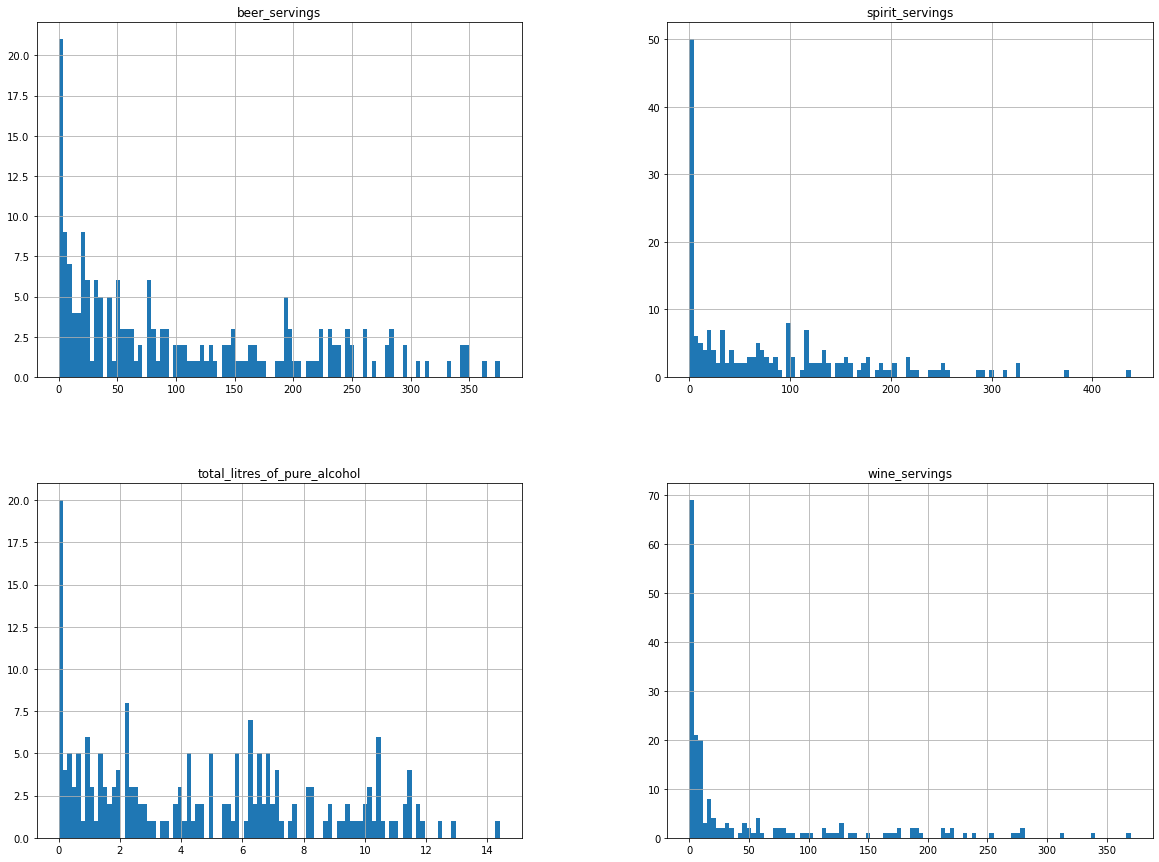

In [18]:
# Create a histogram of each attribute
df_drinks.hist(bins=100, figsize=(20,15))
plt.show()

**Observations:** First, each histogram shows that the data is *skewed right*. Second, beer seems to be the most popular drink in terms of volume consumed.

**Boxplot: Quartiles, Medians, and Outliers**

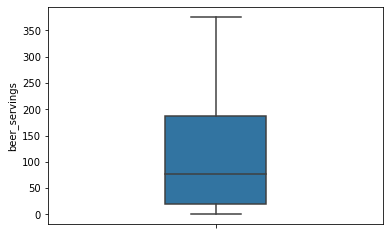

In [19]:
# Boxplot for beer
sns.boxplot( y=df_drinks["beer_servings"], width=0.3)
plt.show()

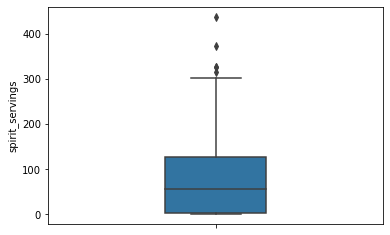

In [20]:
# Boxplot for spirits
sns.boxplot( y=df_drinks["spirit_servings"], width=0.3)
plt.show()

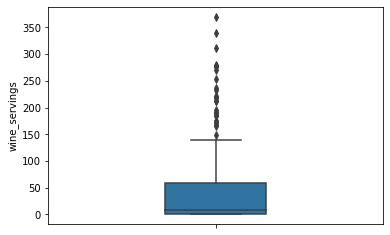

In [21]:
# Boxplot for wine
sns.boxplot( y=df_drinks["wine_servings"], width=0.3)
plt.show()

**Observations:** The boxplots give us a nice display of the distributions of servings for each type of drink. It is also shown that wine servings has the most outliers (between 150 and 438), followed by spirit servings (a small scattering between 150 and 370). Beer servings had the fewest number of outliers, whereas wine had a significant amount of outliers. Moreover, the outliers appeared above the upper quartile (Q3).

### Index of Economic Freedom

**Summary Statistics**

In [22]:
df_IEF.describe()

,CountryID,World Rank,Region Rank,2020 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),GDP Growth Rate (%),5 Year GDP Growth Rate (%),Unemployment (%),Inflation (%),Public Debt (% of GDP)
count,186.000000,180.000000,180.000000,180.000000,185.000000,185.000000,185.000000,180.000000,183.000000,182.000000,...,182.000000,181.000000,181.000000,182.000000,186.000000,185.000000,185.000000,186.000000,185.000000,183.000000
mean,93.500000,90.500000,20.550000,61.592778,56.643243,45.069189,43.755135,77.346111,66.004918,69.129121,...,28.111538,23.712707,21.681768,32.381868,40.388376,3.072432,2.976216,7.212903,5030.657297,56.869945
std,53.837719,52.105662,12.759168,11.270132,18.489532,18.616606,21.205280,13.121071,22.864218,30.267395,...,13.501689,9.062554,10.313871,13.895985,145.999464,3.226562,2.686111,5.847388,68359.131531,34.823529
min,1.000000,1.000000,1.000000,4.200000,10.100000,5.000000,13.100000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.400000,10.800000,0.038000,-18.000000,-12.200000,0.000000,-0.200000,0.000000
25%,47.250000,45.750000,9.750000,54.775000,43.900000,31.700000,28.600000,70.875000,54.400000,54.700000,...,20.000000,19.000000,13.700000,22.650000,2.475000,2.000000,1.900000,3.300000,1.500000,35.950000
50%,93.500000,90.500000,19.500000,61.550000,56.600000,43.400000,38.700000,78.450000,71.000000,80.000000,...,30.000000,25.000000,20.500000,31.100000,9.450000,3.100000,3.000000,5.400000,2.500000,50.500000
75%,139.750000,135.250000,31.000000,69.125000,69.800000,56.200000,51.200000,86.100000,84.500000,93.950000,...,35.000000,30.000000,29.100000,38.775000,29.600000,4.700000,4.500000,9.375000,4.600000,69.900000
max,186.000000,180.000000,47.000000,89.400000,96.800000,92.900000,96.100000,99.800000,96.500000,99.900000,...,60.000000,50.000000,46.200000,125.700000,1395.400000,17.900000,10.500000,30.600000,929789.500000,237.100000


**Exploratory Data Analysis and Visualization**

Let's take a look at some of the attirbutes that will be relevant for future analysis. Specifically, I am interested in certain economic and social factors like *Population*, *World Rank*, *Fiscal Health*, *Income Tax Rate*, *Unemployment*, and *Governemnt Integrity*.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E83A59F160>,
      dtype=object)

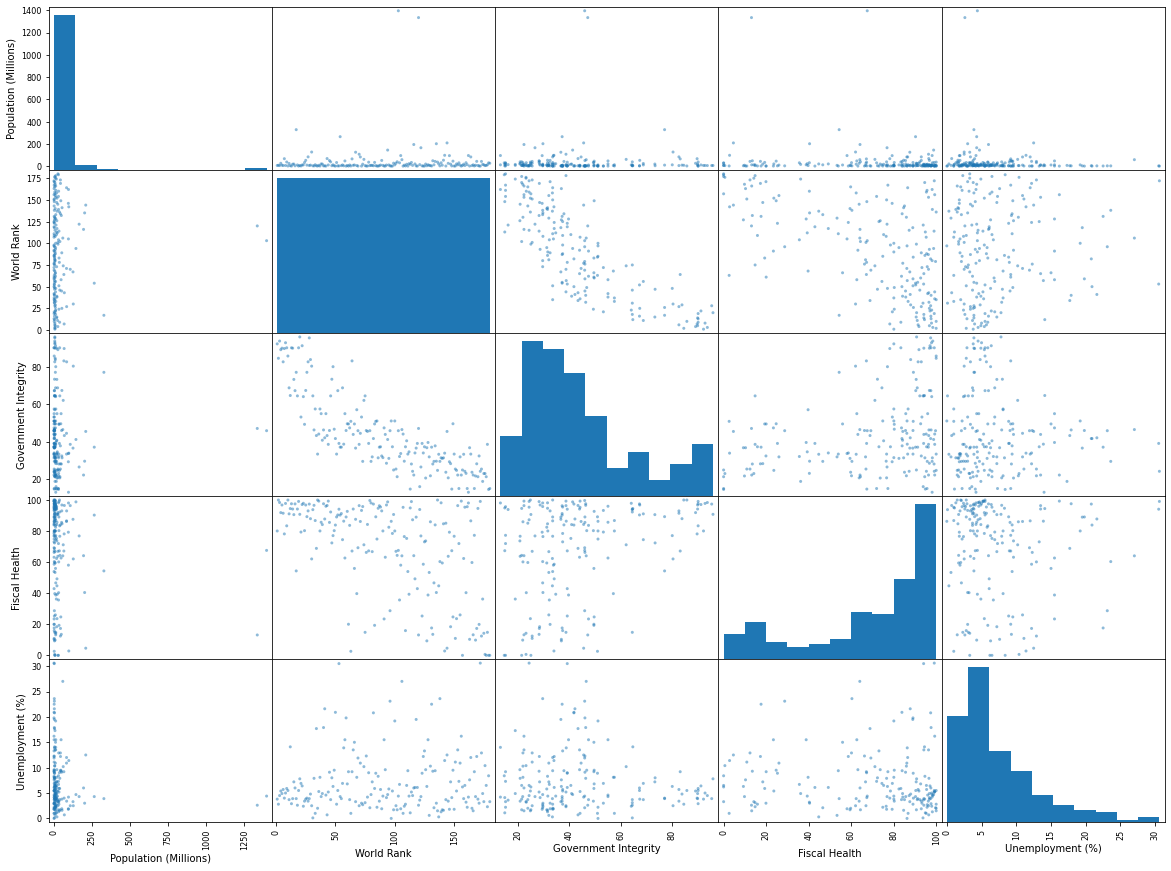

In [23]:
from pandas.plotting import scatter_matrix
IEF_attributes = ["Population (Millions)", "World Rank", "Government Integrity", "Fiscal Health", "Unemployment (%)"]
scatter_matrix(df_IEF[IEF_attributes], figsize=(20,15))

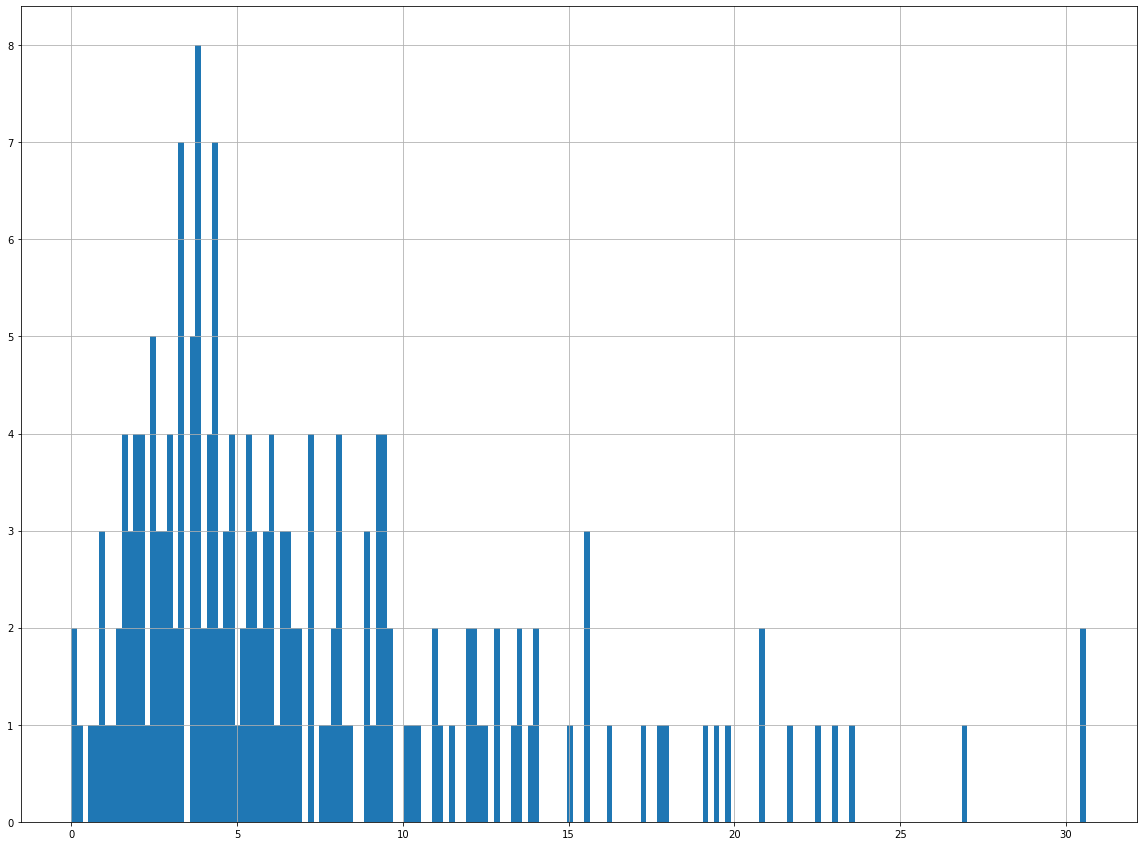

In [24]:
# Create a histogram depicting the distribution of unemployment
df_IEF["Unemployment (%)"].hist(bins=180, figsize=(20,15))
plt.show()

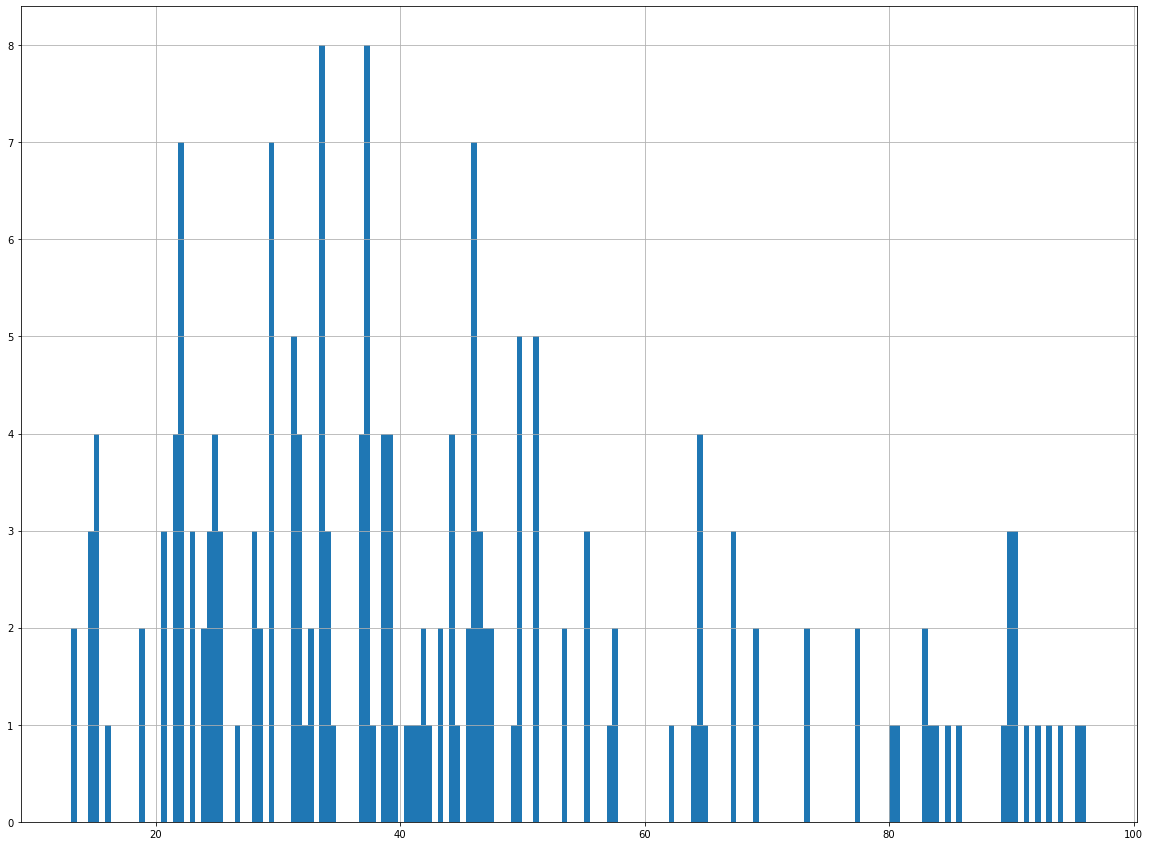

In [25]:
# Create a histogram showing the distribution of 'govenment integrity'
df_IEF["Government Integrity"].hist(bins=180, figsize=(20,15))
plt.show()

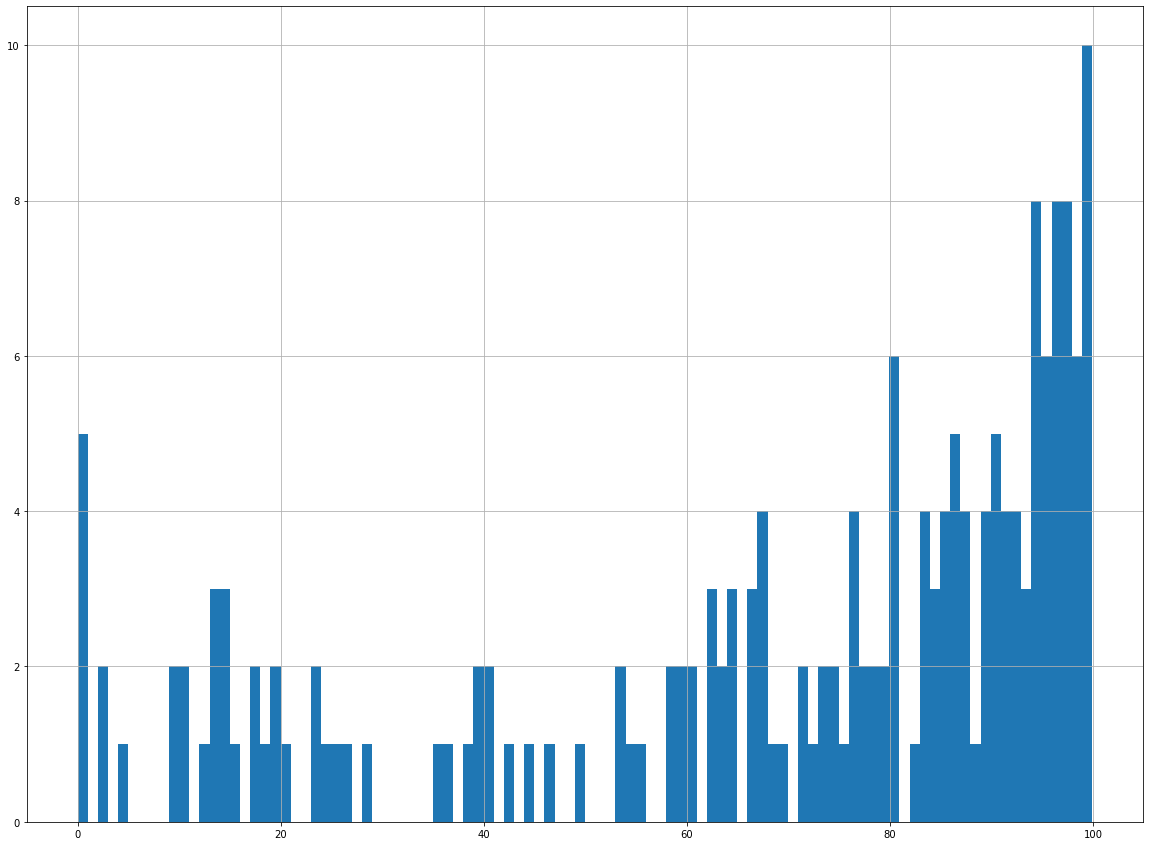

In [26]:
# Create a histogram showing distribution of Fiscal Health scores
df_IEF["Fiscal Health"].hist(bins=100, figsize=(20,15))
plt.show()

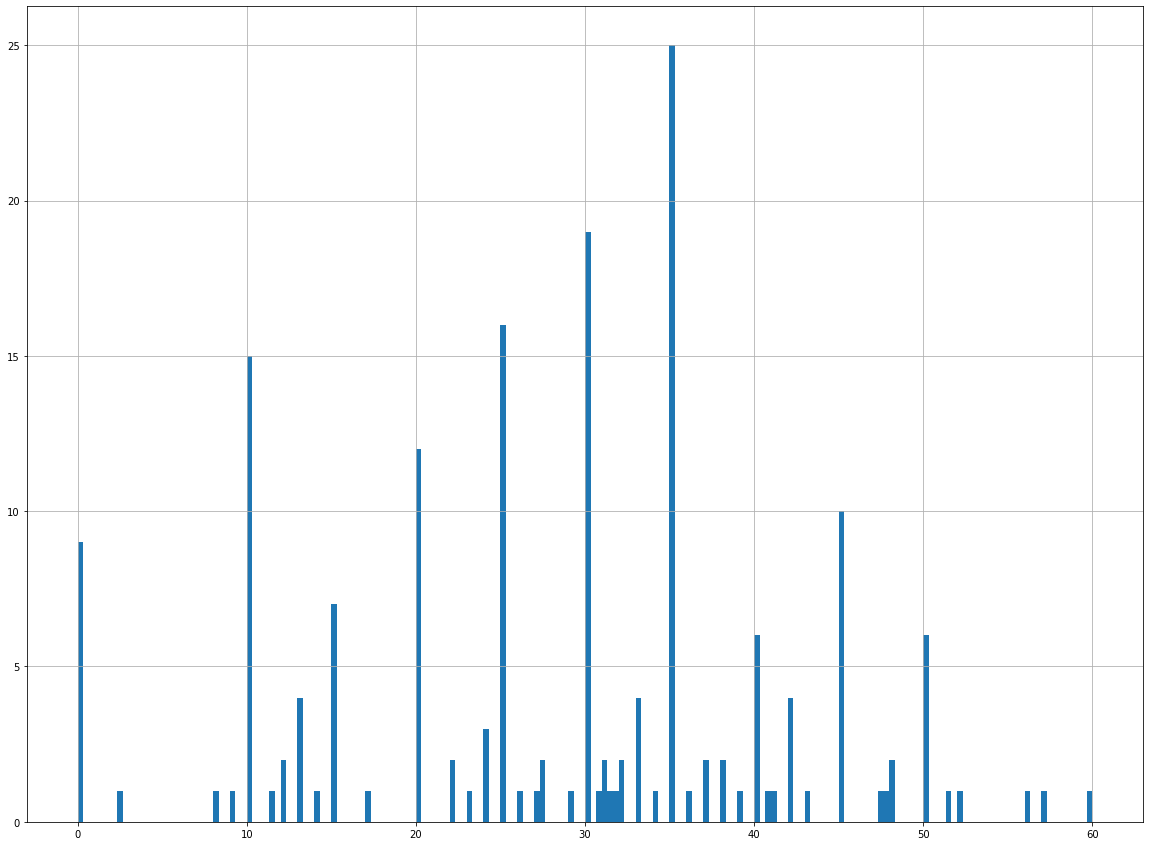

In [27]:
# Create a histogram showing the distribution of Income Tax Rate percentages
df_IEF["Income Tax Rate (%)"].hist(bins=180, figsize=(20,15))
plt.show()

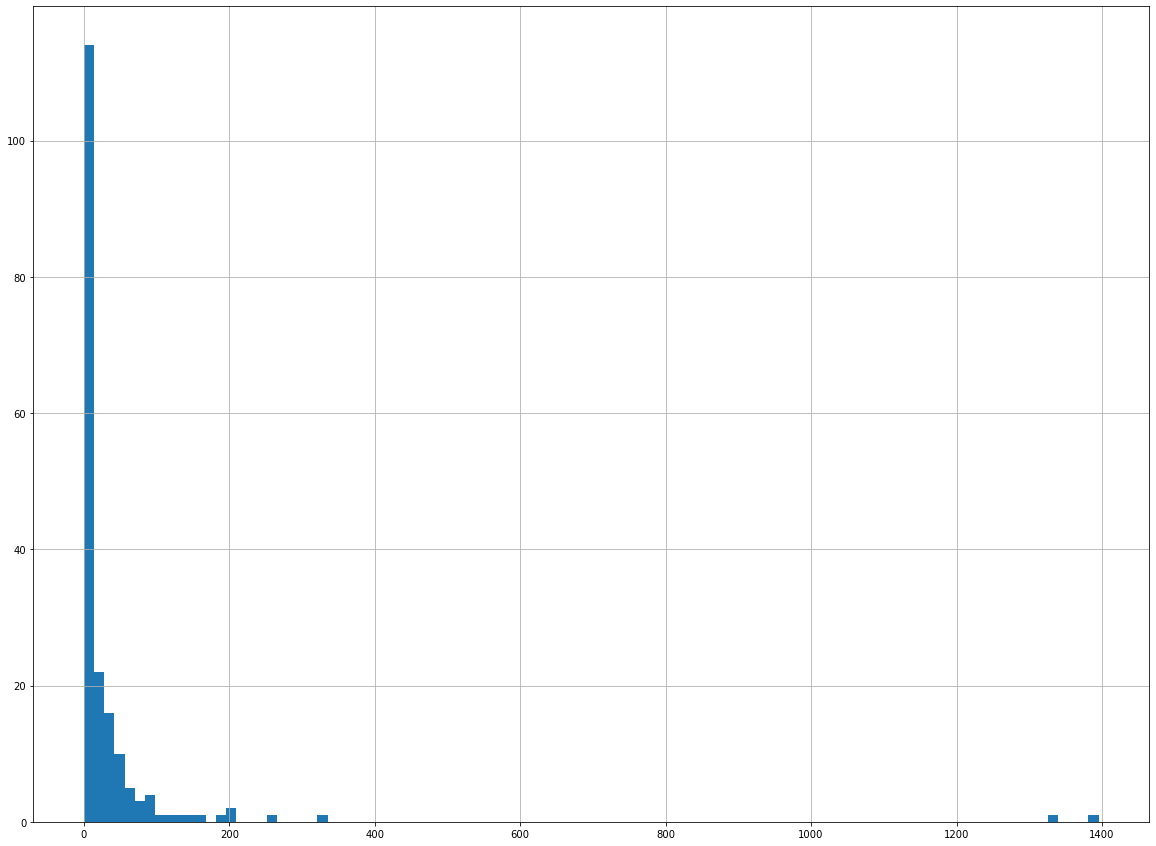

In [28]:
# Create a histogram depicting the distribution of population
df_IEF["Population (Millions)"].hist(bins=100, figsize=(20,15))
plt.show()

**Boxplots**

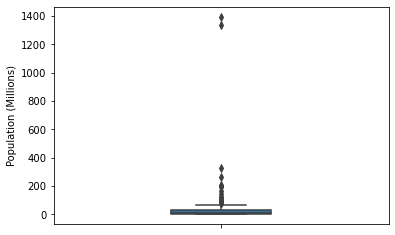

In [29]:
# Create a boxplot to visualizing the quartiles and outliers with regard to population
sns.boxplot( y=df_IEF["Population (Millions)"], width=0.3)
plt.show()

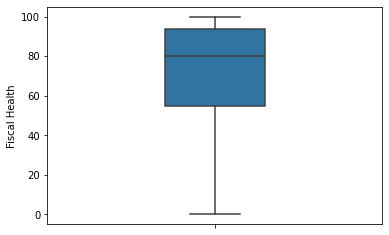

In [30]:
# Create a boxplot to visualizing the quartiles and outliers with regard to fiscal health
sns.boxplot( y=df_IEF["Fiscal Health"], width=0.3)
plt.show()

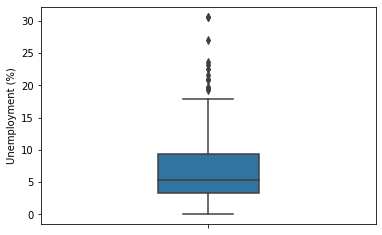

In [31]:
# Create a boxplot to visualizing the quartiles and outliers with regard to unemployment
sns.boxplot( y=df_IEF["Unemployment (%)"], width=0.3)
plt.show()

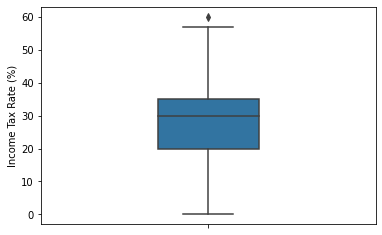

In [32]:
# Create a boxplot to visualizing the quartiles and outliers with regard to income tax rate
sns.boxplot( y=df_IEF["Income Tax Rate (%)"], width=0.3)
plt.show()

**Observations:** First, unemployment is right-skewed, with a higher concentration below 5%. Moreover, there were several outliers above the upper quartile. Second, the distribution of Govenemnt Integrity scores are more evenly disbursed than what we saw for unemployment. Third, income tax rate (%) was fairly spread out with the medium around 30% and a max at 60%. Fourth, the distribution of values for Fiscal Health was primarily left-skewed. On the other hand, population was right-skewed with several extreme outliers above the upper quartile.

### World Happiness Report

**Summary Statistics**

In [33]:
df_WHR.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,1.530000e+02,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,0.053538,5.578175,5.368304,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317e+00,0.868771,1.155607,0.692869,0.463583,0.189375,0.130718,1.972317
std,1.11227,0.018183,1.096823,1.128631,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,1.336643e-15,0.372416,0.286866,0.254094,0.141172,0.100401,0.113097,0.563638
min,2.56690,0.025902,2.628270,2.505530,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,1.972317e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257241
25%,4.72410,0.040698,4.826248,4.603149,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.972317e+00,0.575862,0.986718,0.495443,0.381457,0.115006,0.055805,1.629928
50%,5.51500,0.050606,5.607728,5.430644,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,1.972317e+00,0.918549,1.203987,0.759818,0.483293,0.176745,0.098435,2.046272
75%,6.22850,0.060677,6.363886,6.138881,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,1.972317e+00,1.169229,1.387139,0.867249,0.576665,0.255510,0.163064,2.350267
max,7.80870,0.120590,7.869766,7.747634,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,1.972317e+00,1.536676,1.547567,1.137814,0.693270,0.569814,0.533162,3.440810


**Initial Data Analysis and Visualization**

Let's take a first look at several key attributes: *Logged GDP per capita*, *Social Support*, *Healthy Life Expectancy*, *Freedom to make life choices*, and *Ladder score*.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E839A4ADC0>,
      dtype=object)

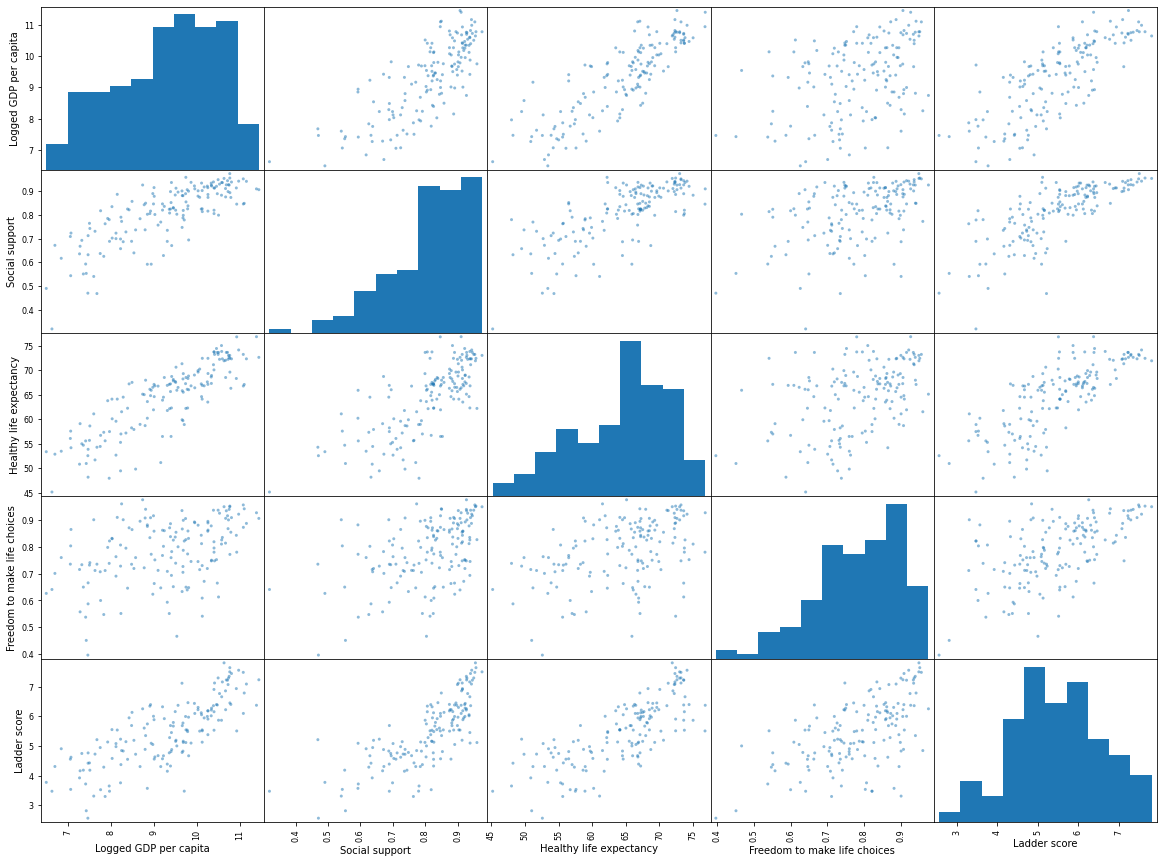

In [34]:
from pandas.plotting import scatter_matrix
WHR_attributes = ["Logged GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Ladder score"]
scatter_matrix(df_WHR[WHR_attributes], figsize=(20,15))

Let's construct individual histograms to get a better understanding of the distributions.

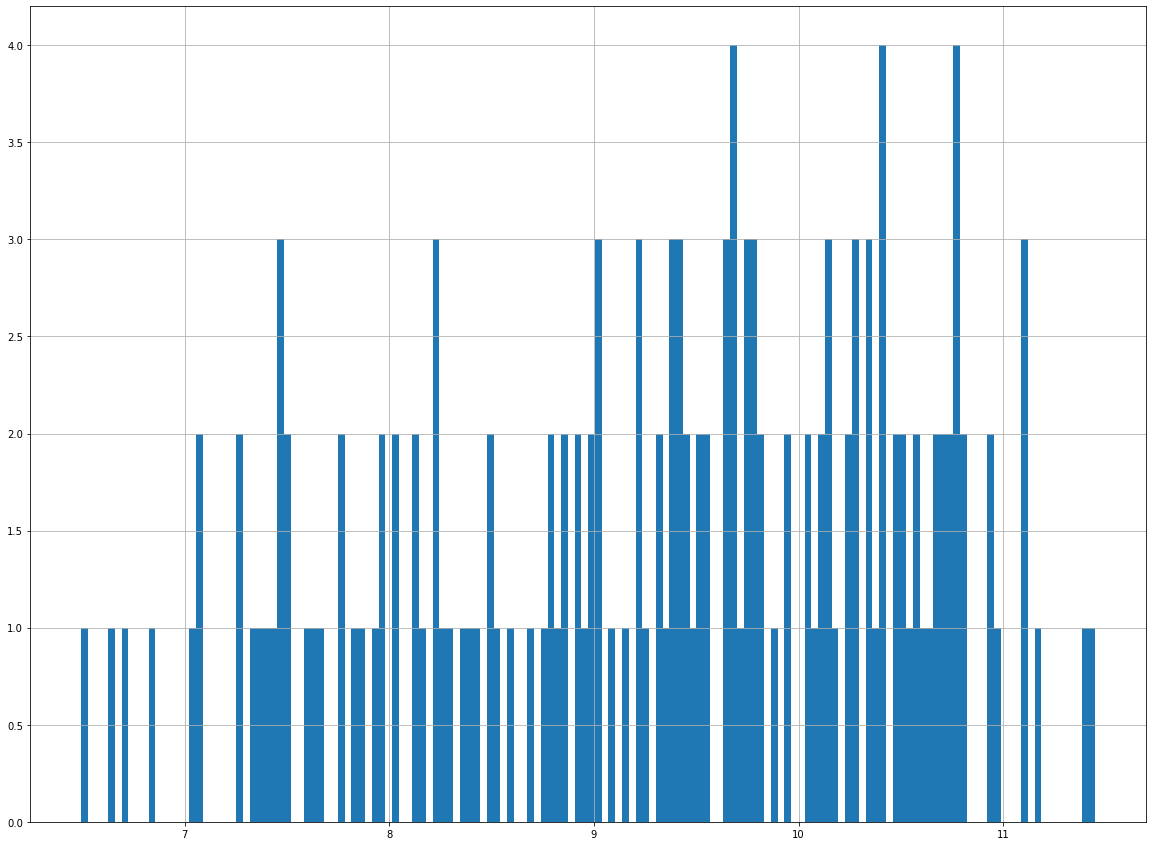

In [35]:
# Create a histogram showing the distribution of GDP per capita
df_WHR["Logged GDP per capita"].hist(bins=150, figsize=(20,15))
plt.show()

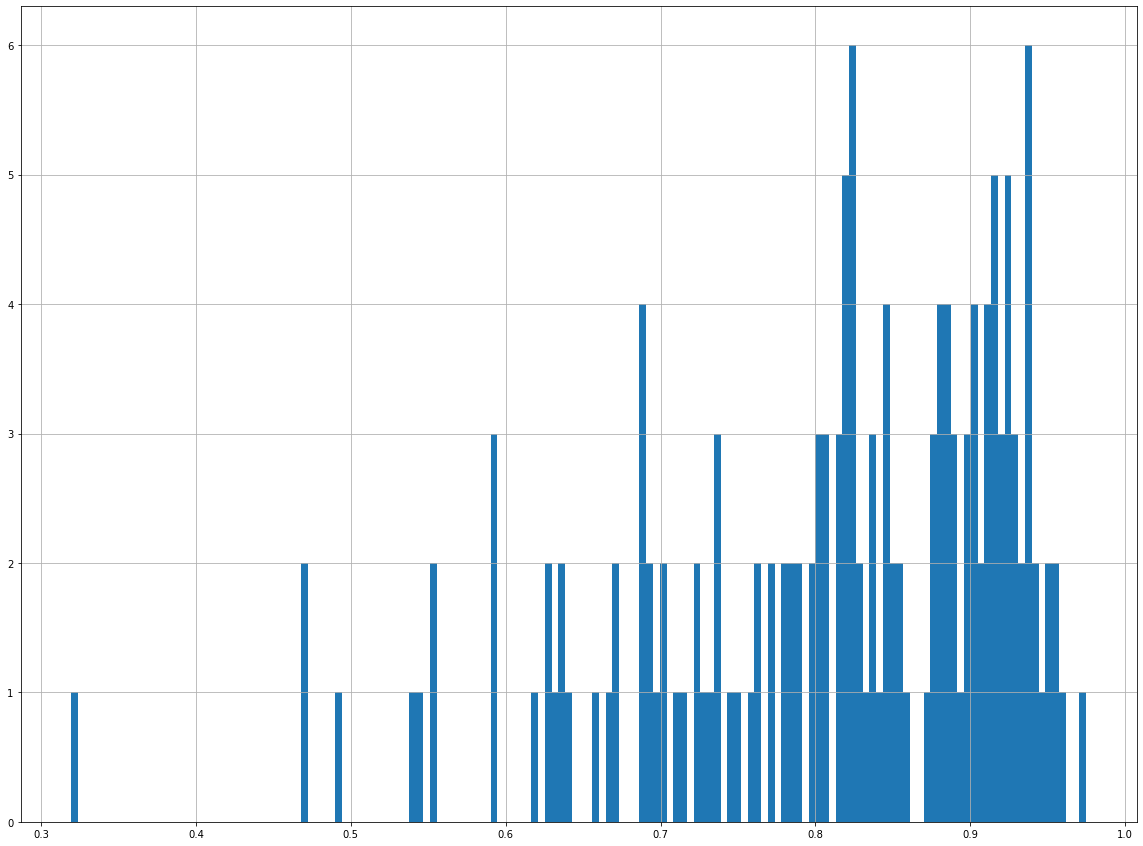

In [36]:
# Create a histogram showing the distribution of Social support
df_WHR["Social support"].hist(bins=150, figsize=(20,15))
plt.show()

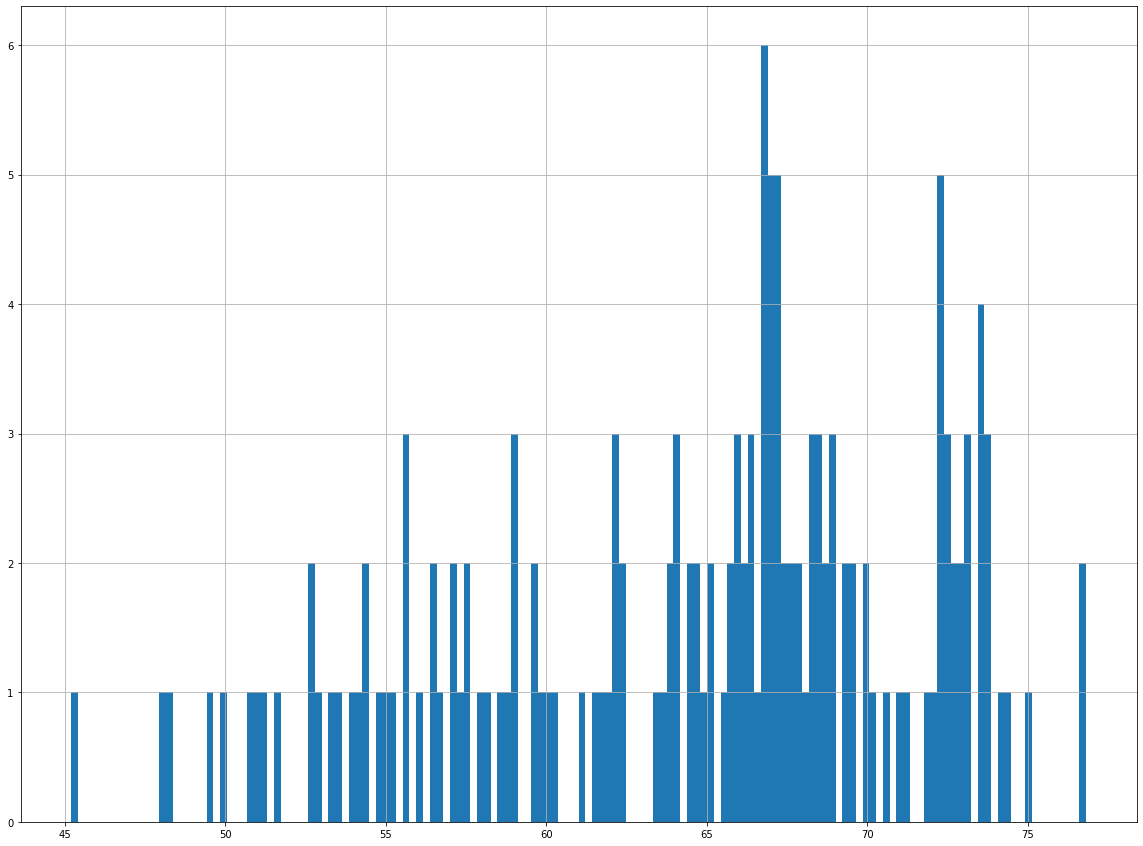

In [37]:
# Create a histogram showing the distribution of GDP per capita
df_WHR["Healthy life expectancy"].hist(bins=150, figsize=(20,15))
plt.show()

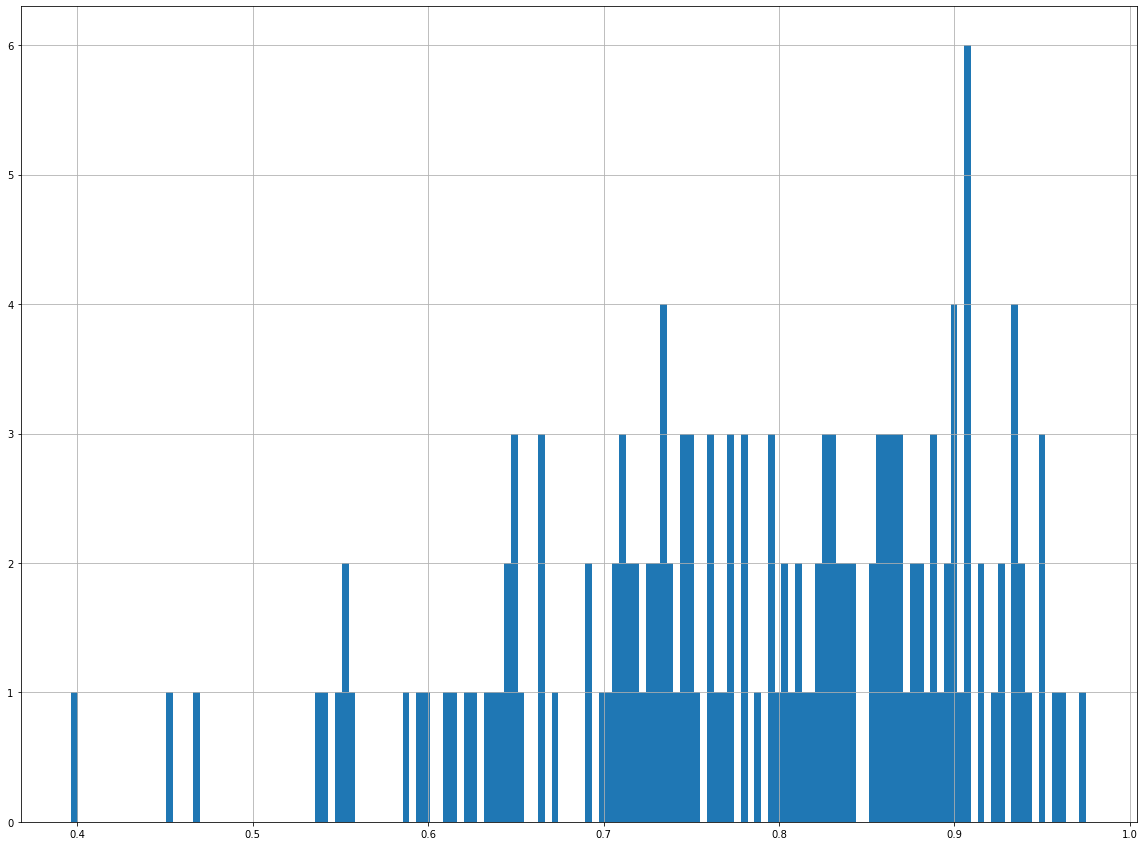

In [38]:
# Create a histogram showing the distribution of values for Freedom to make life choices
df_WHR["Freedom to make life choices"].hist(bins=150, figsize=(20,15))
plt.show()

**Observations:** We can easily see that much of our data is left-skewed. Some noteable observations are the following. The mean for *healthy life expectancy* is 64.45, with a min of 45.2 and a max 78.8. The value for *Social support* trails upward with many countries indicating that there is quite a bit of social support. Similarly with *Freedom to make life choices*.

## Data Cleaning

In this section we will clean and prepare the data by: (1) formatting column names, (2) performing some initial feature selection based on theoretical considerations, (3) filtering columns, (4) standardizing values, (5) normalizing data, (6) merging the datasets into a single dataset, (7) identifying missing values, (8) handling missing values, and (9) and dealing with incorrect data types.

### Formatting Column Names and Correcting Spelling Errors

Before we can merge our datasets together, we need to correctly format our column names.

**Index of Economic Freedom**

In [39]:
# Display the first five rows of the dataset
df_IEF.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2020 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1.0,Afghanistan,Afghanistan,Asia-Pacific,136.0,33.0,54.7,48.3,30.0,24.8,...,Afghanistan,36.0,$72.6,2.3,2.2,"$2,017",1.5,0.6,139.2,7.1
1,2.0,Albania,Albania,Europe,57.0,30.0,66.9,57.1,33.0,38.8,...,Albania,2.9,$38.4,4.2,3.1,"$13,345",13.9,2.0,"1,293.6",68.6
2,3.0,Algeria,Algeria,Middle East and North Africa,169.0,14.0,46.9,37.9,35.0,28.3,...,Algeria,42.6,$657.5,2.1,2.8,"$15,440",12.2,4.3,"1,506.3",36.9
3,4.0,Angola,Angola,Sub-Saharan Africa,154.0,35.0,52.2,36.9,14.3,15.1,...,Angola,29.3,$199.3,-1.7,0.3,"$6,814",7.3,19.6,"-5,732.5",88.1
4,5.0,Argentina,Argentina,Americas,149.0,26.0,53.1,50.5,47.0,49.7,...,Argentina,44.6,$915.1,-2.5,-0.3,"$20,537",9.5,34.3,"12,161.8",86.3


There is an additional column, "Country", positioned before the column, "Population (Millions)". To avoid confusion we will first drop this column.

In [40]:
# Drop the superfluous 'Country' column
df_IEF.drop("Country", axis="columns", inplace=True)

# Display the first five rows
df_IEF.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2020 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1.0,Afghanistan,Afghanistan,Asia-Pacific,136.0,33.0,54.7,48.3,30.0,24.8,...,26.3,36.0,$72.6,2.3,2.2,"$2,017",1.5,0.6,139.2,7.1
1,2.0,Albania,Albania,Europe,57.0,30.0,66.9,57.1,33.0,38.8,...,29.1,2.9,$38.4,4.2,3.1,"$13,345",13.9,2.0,"1,293.6",68.6
2,3.0,Algeria,Algeria,Middle East and North Africa,169.0,14.0,46.9,37.9,35.0,28.3,...,39.8,42.6,$657.5,2.1,2.8,"$15,440",12.2,4.3,"1,506.3",36.9
3,4.0,Angola,Angola,Sub-Saharan Africa,154.0,35.0,52.2,36.9,14.3,15.1,...,21.8,29.3,$199.3,-1.7,0.3,"$6,814",7.3,19.6,"-5,732.5",88.1
4,5.0,Argentina,Argentina,Americas,149.0,26.0,53.1,50.5,47.0,49.7,...,40.5,44.6,$915.1,-2.5,-0.3,"$20,537",9.5,34.3,"12,161.8",86.3


We see that the column, **Judical Effectivness** is mispelled. I will correct that. Afterwards, I'll rename the column, "**Country Name**", to simply, "**Country**" (removing the word 'Name' will assist with the upcoming data merge).

In [41]:
# Fix the mispelled column
df_IEF.rename(columns={"Judical Effectiveness":"Judicial Effectiveness"}, inplace=True)

# Adjust the column name to "Country"
df_IEF.rename(columns={"Country Name": "Country"}, inplace=True)

# Display the columns
df_IEF.columns

Index(['CountryID', 'Country', 'WEBNAME', 'Region', 'World Rank',
       'Region Rank', '2020 Score', 'Property Rights',
       'Judicial Effectiveness', 'Government Integrity', 'Tax Burden',
       'Gov't Spending', 'Fiscal Health', 'Business Freedom', 'Labor Freedom',
       'Monetary Freedom', 'Trade Freedom', 'Investment Freedom ',
       'Financial Freedom', 'Tariff Rate (%)', 'Income Tax Rate (%)',
       'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Gov't Expenditure % of GDP ', 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

**Global Alcohol Consumption**

In [42]:
# First display the first five rows
df_drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


**Note:** we see that the column names are lower-case and there are underscores between words. Also, note the spelling of 'litres' in the last column. I will capitalize the relevant letters, remove the underscores, and change the spelling of 'litres'.

In [43]:
# Rename columns to achieve consistency
df_drinks.rename(columns={"country":"Country", "beer_servings":"Beer Servings", "spirit_servings":"Spirit Servings", "wine_servings":"Wine Servings", "total_litres_of_pure_alcohol":"Total Liters of Pure Alcohol"}, inplace=True)

# Display the columns
df_drinks.columns

Index(['Country', 'Beer Servings', 'Spirit Servings', 'Wine Servings',
       'Total Liters of Pure Alcohol'],
      dtype='object')

**World Happiness Report**

In [44]:
# First display the first five rows
df_WHR.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


**Note:** We need to similarly fix the columns so that the names are in title form. For my purpose here, I am only concerned with a small subset of these columns. I will therefore only adjust those column names. Moreover, we need to shorten the column, **Country name** so that it reads: **Country**. Finally, I will convert the conlumn name, "**Ladder score**", to the name, "**Happiness Score**", in order to clearly denote the meaning of the associated values.

In [45]:
# Correct the columns
df_WHR.rename(columns={"Country name":"Country", "Ladder score": "Happiness Score", "Logged GDP per capita":"Logged GDP Per Capita", "Social support":"Social Support", "Healthy life expectancy":"Healthy Life Expectancy", "Freedom to make life choices":"Freedom to Make Life Choices"}, inplace=True)

# Display the columns
df_WHR.columns

Index(['Country', 'Regional indicator', 'Happiness Score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP Per Capita', 'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

### Initial Feature Selection and Column Filtering Based on Theoretical Considerations

At this point, I need to start the process of selecting the important attributes for further analysis. This initial attempt at feature selection will be based on theoretical considerations. That is to say, based on my current knowledge of the business problem and the available dataset features, I will narrow down which features present themselves as good *predictors* for our target value concerning beer consumption. Afterwards, I will filter the columns and create new dataframes that do not include any unnecessary attributes.

**Note:** A more rigorous process of feature selection will commence later in the project once I have merged the disparate dataframes into a single, cleansed dataframe. I will first check correlation scores to determine which features can be reasonably excluded. Finally, I will begin building machine learning models using *forward step* selection to further determine the best predictor variables.

**Initial Feature Selection**

Given our buisness problem and goal, we need to focus on the global levels of alcohol consumption by type of alcoholic drink. We need to also select a few important social and economic attributes associated with each country. For my purpose, I will select the following attributes from our datasets: Country, Beer Servings, Spirit Servings, Wine Servings, Total Liters of Pure Alcohol, Judicial World Rank, Fiscal Health, Monetary Freedom, Labor Freedom, Business Freedom, Financial Freedom, Property Rights, Government Integrity, Population (Millions), Unemployment (%), Logged GDP Per Capita, Social Support, Healthy Life expectancy, and Freedom to Make Choices. These features are selected as possible predictors for alcohol consumption based on theoretical considerations. It is entirely plausible that these economic and social considerations will impact the way people consume alcoholic beverages.

In [46]:
# Filter the columns of the 'Index of Economic Freedom' dataset and create a new dataframe, 'IEF'
IEF = df_IEF[["Country", "Population (Millions)", "World Rank", "Government Integrity", "Property Rights", "Fiscal Health", "Monetary Freedom", "Labor Freedom", "Business Freedom", "Financial Freedom", "Unemployment (%)"]]

# Display the first five rows of our new dataframe
IEF.head()

,Country,Population (Millions),World Rank,Government Integrity,Property Rights,Fiscal Health,Monetary Freedom,Labor Freedom,Business Freedom,Financial Freedom,Unemployment (%)
0,Afghanistan,36.0,136.0,24.8,48.3,99.9,81.0,61.6,54.7,10.0,1.5
1,Albania,2.9,57.0,38.8,57.1,86.3,81.2,52.1,65.7,70.0,13.9
2,Algeria,42.6,169.0,28.3,37.9,17.3,76.2,50.5,63.0,30.0,12.2
3,Angola,29.3,154.0,15.1,36.9,71.9,59.6,61.1,57.7,40.0,7.3
4,Argentina,44.6,149.0,49.7,50.5,24.7,53.7,46.5,60.2,60.0,9.5


In [47]:
# Filter the columns of the 'Drinks' dataset and create a new dataframe, 'Drinks'
Drinks = df_drinks[["Country", "Beer Servings", "Spirit Servings", "Wine Servings", "Total Liters of Pure Alcohol"]]

# Display the first five rows of our new dataframe
Drinks.head()

,Country,Beer Servings,Spirit Servings,Wine Servings,Total Liters of Pure Alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [48]:
# Filter the columns of the 'World Happiness Report' dataset and create a new dataframe, 'WHR'
WHR = df_WHR[["Country", "Happiness Score", "Logged GDP Per Capita", "Social Support", "Healthy Life Expectancy", "Freedom to Make Life Choices"]]

# Display the first five rows of our new dataframe
WHR.head()

,Country,Happiness Score,Logged GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices
0,Finland,7.8087,10.639267,0.954330,71.900825,0.949172
1,Denmark,7.6456,10.774001,0.955991,72.402504,0.951444
2,Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337
3,Iceland,7.5045,10.772559,0.974670,73.000000,0.948892
4,Norway,7.4880,11.087804,0.952487,73.200783,0.955750


## Data Standardization and Transformation

We need to transform our data so that it has a standard format with consistent units of measurement. Doing so allows us to make meaningful comparisons and analyses given our specific project aims and buisness goals. In particular, there are inconcsistencies with the unit of measurements in our "Drinks" dataframe. For instance, we want to have U.S. standard measurements like ounce, quart, and gallon. The **Wine Servings** is measured in *glasses* or *25 ounces*, the **Beer Servings** is measured in *12 ounce servings*, and the **Spirit Servings** is measured in *1.5 ounce servingsI*. However, **Total Liters of Pure Alcohol** is, of course, in units of *liters*. I will transform liters into *gallons* so that our data is consistent with U.S. standard measurements. I will then rename the column to reflect this change.

**Data Standardization Applied to the 'Drinks' Dataframe**

**Conversion formula:** liters/3.785411784

In [49]:
# Convert liters to gallons and rename the column to reflect the change
Drinks["Gallons of Pure Alcohol"] = Drinks["Total Liters of Pure Alcohol"]/3.785411784

# Drop the Liters columns
Drinks.drop("Total Liters of Pure Alcohol", inplace=True, axis=1)

# Check the transformed data
Drinks.head()

,Country,Beer Servings,Spirit Servings,Wine Servings,Gallons of Pure Alcohol
0,Afghanistan,0,0,0,0.000000
1,Albania,89,132,54,1.294443
2,Algeria,25,0,14,0.184920
3,Andorra,245,138,312,3.275733
4,Angola,217,57,45,1.558615


## Data Normalization

Next we should normalize the data by transforming the numerical values into a similar range. This will help us get better results when using machine learning algorithms. My target here is to normalize variables so that the their corresponding values range from 0 to 1.

**Normalization Formula:** replace (original value) by (original value)/(maximum value)

### IEF Normalization

In [50]:
import warnings
warnings.filterwarnings('ignore')

# Normalize the relevant variables in the IEF dataframe
IEF["Population (Millions)"] = IEF["Population (Millions)"]/IEF["Population (Millions)"].max()
IEF["World Rank"] = IEF["World Rank"]/IEF["World Rank"].max()
IEF["Fiscal Health"] = IEF["Fiscal Health"]/IEF["Fiscal Health"].max()
IEF["Monetary Freedom"] = IEF["Monetary Freedom"]/IEF["Monetary Freedom"].max()
IEF["Labor Freedom"] = IEF["Labor Freedom"]/IEF["Labor Freedom"].max()
IEF["Government Integrity"] = IEF["Government Integrity"]/IEF["Government Integrity"].max()
IEF["Business Freedom"] = IEF["Business Freedom"]/IEF["Business Freedom"].max()
IEF["Unemployment (%)"] = IEF["Unemployment (%)"]/IEF["Unemployment (%)"].max()
IEF["Financial Freedom"] = IEF["Financial Freedom"]/IEF["Financial Freedom"].max()
IEF["Property Rights"] = IEF["Property Rights"]/IEF["Property Rights"].max()

# Check the dataframe by using the head method
IEF.head()

,Country,Population (Millions),World Rank,Government Integrity,Property Rights,Fiscal Health,Monetary Freedom,Labor Freedom,Business Freedom,Financial Freedom,Unemployment (%)
0,Afghanistan,0.025799,0.755556,0.258065,0.498967,1.000000,0.931034,0.677668,0.568607,0.111111,0.049020
1,Albania,0.002078,0.316667,0.403746,0.589876,0.863864,0.933333,0.573157,0.682952,0.777778,0.454248
2,Algeria,0.030529,0.938889,0.294485,0.391529,0.173173,0.875862,0.555556,0.654886,0.333333,0.398693
3,Angola,0.020998,0.855556,0.157128,0.381198,0.719720,0.685057,0.672167,0.599792,0.444444,0.238562
4,Argentina,0.031962,0.827778,0.517170,0.521694,0.247247,0.617241,0.511551,0.625780,0.666667,0.310458


### Drinks Normalization

In [51]:
# Normalize the relevant variables in the Drinks dataframe
Drinks["Beer Servings"] = Drinks["Beer Servings"]/Drinks["Beer Servings"].max()
Drinks["Spirit Servings"] = Drinks["Spirit Servings"]/Drinks["Spirit Servings"].max()
Drinks["Wine Servings"] = Drinks["Wine Servings"]/Drinks["Wine Servings"].max()
Drinks["Gallons of Pure Alcohol"] = Drinks["Gallons of Pure Alcohol"]/Drinks["Gallons of Pure Alcohol"].max()

# check the dataframe
Drinks.head()

,Country,Beer Servings,Spirit Servings,Wine Servings,Gallons of Pure Alcohol
0,Afghanistan,0.000000,0.000000,0.000000,0.000000
1,Albania,0.236702,0.301370,0.145946,0.340278
2,Algeria,0.066489,0.000000,0.037838,0.048611
3,Andorra,0.651596,0.315068,0.843243,0.861111
4,Angola,0.577128,0.130137,0.121622,0.409722


### WHR Normalization

In [52]:
# Normalize the relevant variables in the WHR dataframe
WHR["Happiness Score"] = WHR["Happiness Score"]/WHR["Happiness Score"].max()
WHR["Logged GDP Per Capita"] = WHR["Logged GDP Per Capita"]/WHR["Logged GDP Per Capita"].max()
WHR["Social Support"] = WHR["Social Support"]/WHR["Social Support"].max()
WHR["Healthy Life Expectancy"] = WHR["Healthy Life Expectancy"]/WHR["Healthy Life Expectancy"].max()
WHR["Freedom to Make Life Choices"] = WHR["Freedom to Make Life Choices"]/WHR["Freedom to Make Life Choices"].max()

# Check the dataframe
WHR.head()

,Country,Happiness Score,Logged GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices
0,Finland,1.000000,0.929138,0.979132,0.936153,0.973512
1,Denmark,0.979113,0.940905,0.980836,0.942685,0.975842
2,Switzerland,0.968138,0.958889,0.967350,0.964818,0.944962
3,Iceland,0.961043,0.940779,1.000000,0.950464,0.973224
4,Norway,0.958930,0.968310,0.977240,0.953078,0.980259


## Merging the Data

Now that our three dataframes have been processed, filtered, cleaned, standardized, and normalized, we need to merge them into a single dataframe that I will eventually call, "df". I will merge them onto the **Country** column. Afterwards, I will handle **missing values**.

In [53]:
# Merge the Drinks and IEF dataframes to create a new dataframe, "df_partial"
df_partial = Drinks.merge(IEF, on = "Country", how = "left")

# Check our Merge by viewing the first 20 rows
df_partial.head(20)

,Country,Beer Servings,Spirit Servings,Wine Servings,Gallons of Pure Alcohol,Population (Millions),World Rank,Government Integrity,Property Rights,Fiscal Health,Monetary Freedom,Labor Freedom,Business Freedom,Financial Freedom,Unemployment (%)
0,Afghanistan,0.000000,0.000000,0.000000,0.000000,0.025799,0.755556,0.258065,0.498967,1.000000,0.931034,0.677668,0.568607,0.111111,0.049020
1,Albania,0.236702,0.301370,0.145946,0.340278,0.002078,0.316667,0.403746,0.589876,0.863864,0.933333,0.573157,0.682952,0.777778,0.454248
2,Algeria,0.066489,0.000000,0.037838,0.048611,0.030529,0.938889,0.294485,0.391529,0.173173,0.875862,0.555556,0.654886,0.333333,0.398693
3,Andorra,0.651596,0.315068,0.843243,0.861111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,0.577128,0.130137,0.121622,0.409722,0.020998,0.855556,0.157128,0.381198,0.719720,0.685057,0.672167,0.599792,0.444444,0.238562
5,Antigua & Barbuda,0.271277,0.292237,0.121622,0.340278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Argentina,0.513298,0.057078,0.597297,0.576389,0.031962,0.827778,0.517170,0.521694,0.247247,0.617241,0.511551,0.625780,0.666667,0.310458
7,Armenia,0.055851,0.408676,0.029730,0.263889,0.002150,0.188889,0.451613,0.627066,0.688689,0.873563,0.797580,0.841996,0.777778,0.578431
8,Australia,0.694149,0.164384,0.572973,0.722222,0.018059,0.022222,0.929240,0.855372,0.918919,0.990805,0.924092,0.912682,1.000000,0.176471
9,Austria,0.742021,0.171233,0.516216,0.673611,0.006378,0.161111,0.874089,0.901860,0.879880,0.931034,0.751375,0.758836,0.777778,0.156863


In [54]:
# Let's also view the last 20 rows
df_partial.tail(20)

,Country,Beer Servings,Spirit Servings,Wine Servings,Gallons of Pure Alcohol,Population (Millions),World Rank,Government Integrity,Property Rights,Fiscal Health,Monetary Freedom,Labor Freedom,Business Freedom,Financial Freedom,Unemployment (%)
173,Tonga,0.095745,0.047945,0.013514,0.076389,0.000072,0.594444,0.459938,0.629132,0.952953,0.820690,0.767877,0.779626,0.222222,0.032680
174,Trinidad & Tobago,0.523936,0.356164,0.018919,0.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,Tunisia,0.135638,0.006849,0.054054,0.090278,0.008385,0.711111,0.413111,0.582645,0.388388,0.849425,0.547855,0.811850,0.333333,0.506536
176,Turkey,0.135638,0.050228,0.018919,0.097222,0.058765,0.394444,0.464100,0.592975,0.861862,0.759770,0.541254,0.696466,0.666667,0.356209
177,Turkmenistan,0.050532,0.162100,0.086486,0.152778,0.004157,0.944444,0.222685,0.207645,0.945946,0.789655,0.220022,0.311850,0.111111,0.124183
178,Tuvalu,0.015957,0.093607,0.024324,0.069444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,Uganda,0.119681,0.020548,0.000000,0.576389,0.027806,0.566667,0.222685,0.471074,0.643644,0.896552,0.914191,0.478170,0.444444,0.055556
180,Ukraine,0.547872,0.541096,0.121622,0.618056,0.030099,0.744444,0.394381,0.490702,0.839840,0.724138,0.531353,0.637214,0.333333,0.307190
181,United Arab Emirates,0.042553,0.308219,0.013514,0.194444,0.007453,0.100000,0.672216,0.829545,0.941942,0.914943,0.894389,0.817048,0.666667,0.084967
182,United Kingdom,0.582447,0.287671,0.527027,0.722222,0.047657,0.038889,0.935484,0.952479,0.781782,0.922989,0.804180,0.984407,0.888889,0.130719


In [55]:
# Finish the merging process by combining the final WHR dataframe
df = df_partial.merge(WHR, on = "Country", how = "left")

# Check the final, merged dataframe called, 'df', by viewing the first 20 rows
df.head(20)

,Country,Beer Servings,Spirit Servings,Wine Servings,Gallons of Pure Alcohol,Population (Millions),World Rank,Government Integrity,Property Rights,Fiscal Health,Monetary Freedom,Labor Freedom,Business Freedom,Financial Freedom,Unemployment (%),Happiness Score,Logged GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices
0,Afghanistan,0.000000,0.000000,0.000000,0.000000,0.025799,0.755556,0.258065,0.498967,1.000000,0.931034,0.677668,0.568607,0.111111,0.049020,0.328723,0.651739,0.482591,0.684725,0.406742
1,Albania,0.236702,0.301370,0.145946,0.340278,0.002078,0.316667,0.403746,0.589876,0.863864,0.933333,0.573157,0.682952,0.777778,0.454248,0.625290,0.822478,0.688511,0.894584,0.802047
2,Algeria,0.066489,0.000000,0.037838,0.048611,0.030529,0.938889,0.294485,0.391529,0.173173,0.875862,0.555556,0.654886,0.333333,0.398693,0.640965,0.832961,0.824264,0.858089,0.478576
3,Andorra,0.651596,0.315068,0.843243,0.861111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,0.577128,0.130137,0.121622,0.409722,0.020998,0.855556,0.157128,0.381198,0.719720,0.685057,0.672167,0.599792,0.444444,0.238562,NaN,NaN,NaN,NaN,NaN
5,Antigua & Barbuda,0.271277,0.292237,0.121622,0.340278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Argentina,0.513298,0.057078,0.597297,0.576389,0.031962,0.827778,0.517170,0.521694,0.247247,0.617241,0.511551,0.625780,0.666667,0.310458,0.765134,0.856801,0.923973,0.895829,0.852445
7,Armenia,0.055851,0.408676,0.029730,0.263889,0.002150,0.188889,0.451613,0.627066,0.688689,0.873563,0.797580,0.841996,0.777778,0.578431,0.598922,0.794754,0.777165,0.869097,0.730276
8,Australia,0.694149,0.164384,0.572973,0.722222,0.018059,0.022222,0.929240,0.855372,0.918919,0.990805,0.924092,0.912682,1.000000,0.176471,0.924968,0.936241,0.969410,0.958335,0.938906
9,Austria,0.742021,0.171233,0.516216,0.673611,0.006378,0.161111,0.874089,0.901860,0.879880,0.931034,0.751375,0.758836,0.777778,0.156863,0.934112,0.938182,0.952165,0.950497,0.923068


In [56]:
# Check the last 20 rows
df.tail(20)

,Country,Beer Servings,Spirit Servings,Wine Servings,Gallons of Pure Alcohol,Population (Millions),World Rank,Government Integrity,Property Rights,Fiscal Health,Monetary Freedom,Labor Freedom,Business Freedom,Financial Freedom,Unemployment (%),Happiness Score,Logged GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices
173,Tonga,0.095745,0.047945,0.013514,0.076389,0.000072,0.594444,0.459938,0.629132,0.952953,0.820690,0.767877,0.779626,0.222222,0.032680,NaN,NaN,NaN,NaN,NaN
174,Trinidad & Tobago,0.523936,0.356164,0.018919,0.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,Tunisia,0.135638,0.006849,0.054054,0.090278,0.008385,0.711111,0.413111,0.582645,0.388388,0.849425,0.547855,0.811850,0.333333,0.506536,0.562475,0.813486,0.706617,0.871014,0.608577
176,Turkey,0.135638,0.050228,0.018919,0.097222,0.058765,0.394444,0.464100,0.592975,0.861862,0.759770,0.541254,0.696466,0.666667,0.356209,0.657190,0.884613,0.847788,0.871078,0.624443
177,Turkmenistan,0.050532,0.162100,0.086486,0.152778,0.004157,0.944444,0.222685,0.207645,0.945946,0.789655,0.220022,0.311850,0.111111,0.124183,0.655564,0.851306,0.983889,0.810000,0.847650
178,Tuvalu,0.015957,0.093607,0.024324,0.069444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,Uganda,0.119681,0.020548,0.000000,0.576389,0.027806,0.566667,0.222685,0.471074,0.643644,0.896552,0.914191,0.478170,0.444444,0.055556,0.567572,0.655017,0.784876,0.725324,0.750477
180,Ukraine,0.547872,0.541096,0.121622,0.618056,0.030099,0.744444,0.394381,0.490702,0.839840,0.724138,0.531353,0.637214,0.333333,0.307190,0.584054,0.786913,0.901720,0.841184,0.680085
181,United Arab Emirates,0.042553,0.308219,0.013514,0.194444,0.007453,0.100000,0.672216,0.829545,0.941942,0.914943,0.894389,0.817048,0.666667,0.084967,0.869645,0.970248,0.871250,0.873422,0.965484
182,United Kingdom,0.582447,0.287671,0.527027,0.722222,0.047657,0.038889,0.935484,0.952479,0.781782,0.922989,0.804180,0.984407,0.888889,0.130719,0.917502,0.925721,0.961026,0.941371,0.856149


## Handling Missing Values

Next, I'll locate and imppute missing values in the data. Any missing values will be replaced with the mean value for the corresponding variable.

**Evaluate the Merged Dataframe, df, to Locate Missing Values**

In [57]:
# Employ'isnull().sum()' to locate missing values
df.isnull().sum()

Country                          0
Beer Servings                    0
Spirit Servings                  0
Wine Servings                    0
Gallons of Pure Alcohol          0
Population (Millions)           29
World Rank                      34
Government Integrity            29
Property Rights                 29
Fiscal Health                   32
Monetary Freedom                30
Labor Freedom                   30
Business Freedom                29
Financial Freedom               34
Unemployment (%)                29
Happiness Score                 53
Logged GDP Per Capita           53
Social Support                  53
Healthy Life Expectancy         53
Freedom to Make Life Choices    53
dtype: int64

We can double check the amount of missing values by employing a custom function that prints out the number of missing values versus non-missing values per column.

In [58]:
# double check
df_missing = df.isnull()

# function to return a list of missing values 
for column in df_missing.columns.values.tolist():
    print(column)
    print(df_missing[column].value_counts())
    print("")

Country
False    193
Name: Country, dtype: int64

Beer Servings
False    193
Name: Beer Servings, dtype: int64

Spirit Servings
False    193
Name: Spirit Servings, dtype: int64

Wine Servings
False    193
Name: Wine Servings, dtype: int64

Gallons of Pure Alcohol
False    193
Name: Gallons of Pure Alcohol, dtype: int64

Population (Millions)
False    164
True      29
Name: Population (Millions), dtype: int64

World Rank
False    159
True      34
Name: World Rank, dtype: int64

Government Integrity
False    164
True      29
Name: Government Integrity, dtype: int64

Property Rights
False    164
True      29
Name: Property Rights, dtype: int64

Fiscal Health
False    161
True      32
Name: Fiscal Health, dtype: int64

Monetary Freedom
False    163
True      30
Name: Monetary Freedom, dtype: int64

Labor Freedom
False    163
True      30
Name: Labor Freedom, dtype: int64

Business Freedom
False    164
True      29
Name: Business Freedom, dtype: int64

Financial Freedom
False    159
True   

**Show the percentage of Missing Values by Column**

In [59]:
# Create a dataframe that shows the percentage of missing values in each column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({"percent_missing": percent_missing})

# Display the missing_values dataframe
missing_values

,percent_missing
Country,0.000000
Beer Servings,0.000000
Spirit Servings,0.000000
Wine Servings,0.000000
Gallons of Pure Alcohol,0.000000
Population (Millions),15.025907
World Rank,17.616580
Government Integrity,15.025907
Property Rights,15.025907
Fiscal Health,16.580311


**Remarks:**

1. Since the percentage of missing values never exceeds 28% for only a small number of columns, I will not proceed to drop those values by dropping entire columns. Rather, I will impute the missing values.
2. To combat the way outliers can possibly distort our data, we will replace any NaN values in a given row with the median value of the corresponding variable.

**Imputing Missing Values**

In [60]:
# Impute missing values with the median
df_imputed = df.fillna(df.median())

In [61]:
# Check to see if there are any remaining missing values
df_imputed.isnull().sum()

Country                         0
Beer Servings                   0
Spirit Servings                 0
Wine Servings                   0
Gallons of Pure Alcohol         0
Population (Millions)           0
World Rank                      0
Government Integrity            0
Property Rights                 0
Fiscal Health                   0
Monetary Freedom                0
Labor Freedom                   0
Business Freedom                0
Financial Freedom               0
Unemployment (%)                0
Happiness Score                 0
Logged GDP Per Capita           0
Social Support                  0
Healthy Life Expectancy         0
Freedom to Make Life Choices    0
dtype: int64

In [62]:
# check the first 20 rows
df_imputed.head(20)

,Country,Beer Servings,Spirit Servings,Wine Servings,Gallons of Pure Alcohol,Population (Millions),World Rank,Government Integrity,Property Rights,Fiscal Health,Monetary Freedom,Labor Freedom,Business Freedom,Financial Freedom,Unemployment (%),Happiness Score,Logged GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices
0,Afghanistan,0.000000,0.000000,0.000000,0.000000,0.025799,0.755556,0.258065,0.498967,1.000000,0.931034,0.677668,0.568607,0.111111,0.049020,0.328723,0.651739,0.482591,0.684725,0.406742
1,Albania,0.236702,0.301370,0.145946,0.340278,0.002078,0.316667,0.403746,0.589876,0.863864,0.933333,0.573157,0.682952,0.777778,0.454248,0.625290,0.822478,0.688511,0.894584,0.802047
2,Algeria,0.066489,0.000000,0.037838,0.048611,0.030529,0.938889,0.294485,0.391529,0.173173,0.875862,0.555556,0.654886,0.333333,0.398693,0.640965,0.832961,0.824264,0.858089,0.478576
3,Andorra,0.651596,0.315068,0.843243,0.861111,0.007095,0.511111,0.402706,0.586777,0.800801,0.881609,0.656766,0.650728,0.555556,0.178105,0.705604,0.827754,0.854840,0.865082,0.828956
4,Angola,0.577128,0.130137,0.121622,0.409722,0.020998,0.855556,0.157128,0.381198,0.719720,0.685057,0.672167,0.599792,0.444444,0.238562,0.705604,0.827754,0.854840,0.865082,0.828956
5,Antigua & Barbuda,0.271277,0.292237,0.121622,0.340278,0.007095,0.511111,0.402706,0.586777,0.800801,0.881609,0.656766,0.650728,0.555556,0.178105,0.705604,0.827754,0.854840,0.865082,0.828956
6,Argentina,0.513298,0.057078,0.597297,0.576389,0.031962,0.827778,0.517170,0.521694,0.247247,0.617241,0.511551,0.625780,0.666667,0.310458,0.765134,0.856801,0.923973,0.895829,0.852445
7,Armenia,0.055851,0.408676,0.029730,0.263889,0.002150,0.188889,0.451613,0.627066,0.688689,0.873563,0.797580,0.841996,0.777778,0.578431,0.598922,0.794754,0.777165,0.869097,0.730276
8,Australia,0.694149,0.164384,0.572973,0.722222,0.018059,0.022222,0.929240,0.855372,0.918919,0.990805,0.924092,0.912682,1.000000,0.176471,0.924968,0.936241,0.969410,0.958335,0.938906
9,Austria,0.742021,0.171233,0.516216,0.673611,0.006378,0.161111,0.874089,0.901860,0.879880,0.931034,0.751375,0.758836,0.777778,0.156863,0.934112,0.938182,0.952165,0.950497,0.923068


In [63]:
# Recall the shape of the IEF dataframe
df_imputed.shape

(193, 20)

## Correcting Data Formats

Now, let's check to see that the data in our dataframe is in the correct format. I'll use the **dtypes()** method to verify that the datatypes are correct. Afterwards, I will make any adjustments (if adjustments are needed).

In [64]:
# Check datatypes
df_imputed.dtypes

Country                          object
Beer Servings                   float64
Spirit Servings                 float64
Wine Servings                   float64
Gallons of Pure Alcohol         float64
Population (Millions)           float64
World Rank                      float64
Government Integrity            float64
Property Rights                 float64
Fiscal Health                   float64
Monetary Freedom                float64
Labor Freedom                   float64
Business Freedom                float64
Financial Freedom               float64
Unemployment (%)                float64
Happiness Score                 float64
Logged GDP Per Capita           float64
Social Support                  float64
Healthy Life Expectancy         float64
Freedom to Make Life Choices    float64
dtype: object

Everything looks good.

## Rename the Dataframe and Perfom a Final Inspection

**Rename the Dataframe**

In [65]:
# Change the name from 'df_imputed' back to 'df'
df = df_imputed

# Check the first 5 rows of df
df.head()

,Country,Beer Servings,Spirit Servings,Wine Servings,Gallons of Pure Alcohol,Population (Millions),World Rank,Government Integrity,Property Rights,Fiscal Health,Monetary Freedom,Labor Freedom,Business Freedom,Financial Freedom,Unemployment (%),Happiness Score,Logged GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices
0,Afghanistan,0.000000,0.000000,0.000000,0.000000,0.025799,0.755556,0.258065,0.498967,1.000000,0.931034,0.677668,0.568607,0.111111,0.049020,0.328723,0.651739,0.482591,0.684725,0.406742
1,Albania,0.236702,0.301370,0.145946,0.340278,0.002078,0.316667,0.403746,0.589876,0.863864,0.933333,0.573157,0.682952,0.777778,0.454248,0.625290,0.822478,0.688511,0.894584,0.802047
2,Algeria,0.066489,0.000000,0.037838,0.048611,0.030529,0.938889,0.294485,0.391529,0.173173,0.875862,0.555556,0.654886,0.333333,0.398693,0.640965,0.832961,0.824264,0.858089,0.478576
3,Andorra,0.651596,0.315068,0.843243,0.861111,0.007095,0.511111,0.402706,0.586777,0.800801,0.881609,0.656766,0.650728,0.555556,0.178105,0.705604,0.827754,0.854840,0.865082,0.828956
4,Angola,0.577128,0.130137,0.121622,0.409722,0.020998,0.855556,0.157128,0.381198,0.719720,0.685057,0.672167,0.599792,0.444444,0.238562,0.705604,0.827754,0.854840,0.865082,0.828956


In [66]:
# check the last 5 rows of df
df.tail()

,Country,Beer Servings,Spirit Servings,Wine Servings,Gallons of Pure Alcohol,Population (Millions),World Rank,Government Integrity,Property Rights,Fiscal Health,Monetary Freedom,Labor Freedom,Business Freedom,Financial Freedom,Unemployment (%),Happiness Score,Logged GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices
188,Venezuela,0.885638,0.228311,0.008108,0.534722,0.020926,0.994444,0.151925,0.104339,0.000000,0.000000,0.304730,0.320166,0.111111,0.274510,0.647124,0.784040,0.913549,0.865903,0.639261
189,Vietnam,0.295213,0.004566,0.002703,0.138889,0.067794,0.583333,0.351717,0.543388,0.580581,0.783908,0.687569,0.681913,0.555556,0.062092,0.685581,0.769347,0.872077,0.884748,0.963687
190,Yemen,0.015957,0.000000,0.000000,0.006944,0.022073,0.511111,0.227888,0.232438,0.601602,0.489655,0.481848,0.456341,0.555556,0.421569,0.451727,0.677661,0.839239,0.738592,0.615304
191,Zambia,0.085106,0.043379,0.010811,0.173611,0.012756,0.816667,0.295525,0.466942,0.184184,0.829885,0.517052,0.690229,0.555556,0.235294,0.481437,0.718273,0.716986,0.720001,0.827181
192,Zimbabwe,0.170213,0.041096,0.010811,0.326389,0.010965,0.966667,0.196670,0.348140,0.362362,0.721839,0.474147,0.406445,0.111111,0.160131,0.422503,0.686921,0.782925,0.724140,0.729702


In [67]:
# Re-check for missing values
df.isnull().sum()

Country                         0
Beer Servings                   0
Spirit Servings                 0
Wine Servings                   0
Gallons of Pure Alcohol         0
Population (Millions)           0
World Rank                      0
Government Integrity            0
Property Rights                 0
Fiscal Health                   0
Monetary Freedom                0
Labor Freedom                   0
Business Freedom                0
Financial Freedom               0
Unemployment (%)                0
Happiness Score                 0
Logged GDP Per Capita           0
Social Support                  0
Healthy Life Expectancy         0
Freedom to Make Life Choices    0
dtype: int64

In [68]:
# Use the 'info()' method
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       193 non-null    object 
 1   Beer Servings                 193 non-null    float64
 2   Spirit Servings               193 non-null    float64
 3   Wine Servings                 193 non-null    float64
 4   Gallons of Pure Alcohol       193 non-null    float64
 5   Population (Millions)         193 non-null    float64
 6   World Rank                    193 non-null    float64
 7   Government Integrity          193 non-null    float64
 8   Property Rights               193 non-null    float64
 9   Fiscal Health                 193 non-null    float64
 10  Monetary Freedom              193 non-null    float64
 11  Labor Freedom                 193 non-null    float64
 12  Business Freedom              193 non-null    float64
 13  Finan

In [69]:
# Snapshot of the shape
df.shape

(193, 20)

We are good to go. Our data has been processed, cleaned, formatted, standardized, normalized, merged, and checked for errors. Our cleansed dataframe, df, can now be analyzed.

## Exploring Different Approaches and Various Models With Different Predictors

## Correlation

At this stage, I can start building different regression models on the cleasned data. However, before I do that, I will first examine the correlation and plots of the cleansed dataframe. Doing so will help determine further features to eliminate from the models. It will also provide insight as to whether we can build a successful regression model. Afterwards, I will explore several types of models. In creating models, I will carve up the data into a training sets and a testing sets with different predictors. Each model will be evaluated and the best model will be identified.

In [70]:
df.corr()

,Beer Servings,Spirit Servings,Wine Servings,Gallons of Pure Alcohol,Population (Millions),World Rank,Government Integrity,Property Rights,Fiscal Health,Monetary Freedom,Labor Freedom,Business Freedom,Financial Freedom,Unemployment (%),Happiness Score,Logged GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices
Beer Servings,1.000000,0.458819,0.527172,0.835839,-0.076589,-0.426974,0.480844,0.409534,0.222336,0.132487,0.124020,0.315148,0.419154,0.095868,0.495354,0.493781,0.490336,0.419102,0.220448
Spirit Servings,0.458819,1.000000,0.194797,0.654968,0.056140,-0.276107,0.220831,0.222390,0.222457,0.091418,0.112228,0.212349,0.199579,-0.004611,0.270576,0.298028,0.346089,0.317843,0.078577
Wine Servings,0.527172,0.194797,1.000000,0.667598,-0.079679,-0.441177,0.617025,0.521087,0.240876,0.250603,0.053484,0.378168,0.434168,0.065633,0.506978,0.507963,0.402158,0.484667,0.199753
Gallons of Pure Alcohol,0.835839,0.654968,0.667598,1.000000,-0.044251,-0.449289,0.511509,0.447121,0.251138,0.176451,0.177199,0.328933,0.393239,0.028394,0.436658,0.450574,0.431298,0.386742,0.159330
Population (Millions),-0.076589,0.056140,-0.079679,-0.044251,1.000000,0.055141,0.002520,0.018523,-0.136577,-0.082755,-0.065292,0.063163,-0.113382,-0.077376,-0.124803,-0.023385,-0.132679,-0.029111,0.095012
World Rank,-0.426974,-0.276107,-0.441177,-0.449289,0.055141,1.000000,-0.801361,-0.846455,-0.548521,-0.424407,-0.456846,-0.734902,-0.798923,0.106897,-0.605132,-0.645577,-0.489487,-0.574905,-0.430418
Government Integrity,0.480844,0.220831,0.617025,0.511509,0.002520,-0.801361,1.000000,0.887748,0.282099,0.408510,0.347442,0.743355,0.671344,-0.082201,0.692881,0.695639,0.514985,0.644869,0.434015
Property Rights,0.409534,0.222390,0.521087,0.447121,0.018523,-0.846455,0.887748,1.000000,0.345956,0.519134,0.431611,0.801201,0.689181,-0.118378,0.643055,0.687433,0.487934,0.631038,0.445690
Fiscal Health,0.222336,0.222457,0.240876,0.251138,-0.136577,-0.548521,0.282099,0.345956,1.000000,0.285101,0.183627,0.258281,0.297380,-0.115477,0.281910,0.266799,0.207046,0.226008,0.170453
Monetary Freedom,0.132487,0.091418,0.250603,0.176451,-0.082755,-0.424407,0.408510,0.519134,0.285101,1.000000,0.322257,0.408270,0.418299,-0.059995,0.323632,0.292576,0.126050,0.258899,0.209790


**Observation:** The following features have some of the strongest correlations with *Wine Servings*: *Government Integrity*, *Property Rights*, *Labor Freedom*, *Happiness Score*, *Logged GDP Per Capita*, and *Healthy Life Expectancy*. 

**Evaluation of Correlations:** Several of the economic and social features in our dataframe seem to have weak or moderate correlation values wtih Wine Servings.

**Further feature Selection:** More feature selection will be performed. I will first visualize the relationship between the above features (whiche were based on correlation) and the target variable, *Wine Servings*. I will select a subset of these features to use in model development.

**Adhering to Principles of Parsimony:** It is my aim to construct a model has strong predictive power. However, I will adhere to principles of parsimony by ensuring that the model is as simple as possible. Only a subset of the *relevant features* listed above will be included as predictors.

### P-values and Initial Visualizations of Linear Relationships

Based on the correlation values, I might not be able to produce a model that shows a strong positive correlation between *Wine Servings* and several other selected features of our dataframe. But I can visualize the relations with the *regplot()* function to give us a better idea as to which features have predictive power. I will also provide P-values and correlation values. I will then use this to select a subset of features for model development.

In [71]:
# Import stats modules
from scipy import stats

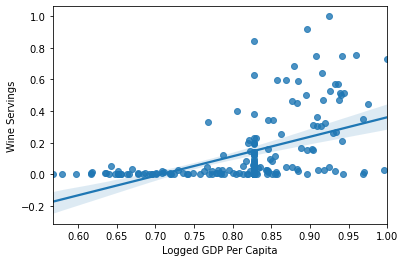

In [72]:
# GDP Per Capita and Wine Servings
sns.regplot(x="Logged GDP Per Capita", y="Wine Servings", data=df)

In [73]:
# Get the Pearson Correlation Coefficient and P-value
pearson_coef, p_value = stats.pearsonr(df["Logged GDP Per Capita"], df["Wine Servings"])

# display the Pearson Correlation coefficient and the P-value
print("The Pearson correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson correlation Coefficient is 0.5079630139118811  with a P-value of P =  4.686737227514223e-14


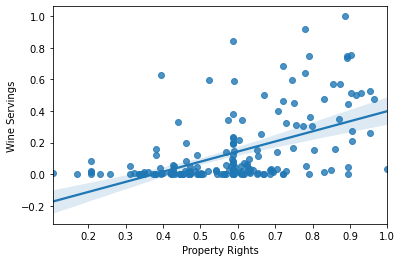

In [74]:
# Property rights and Wine Servings
sns.regplot(x="Property Rights", y="Wine Servings", data=df)

In [75]:
# Get the Pearson Correlation Coefficient and P-value
pearson_coef, p_value = stats.pearsonr(df["Property Rights"], df["Wine Servings"])

# display the Pearson Correlation coefficient and the P-value
print("The Pearson correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson correlation Coefficient is 0.5210867913451325  with a P-value of P =  7.912884297711097e-15


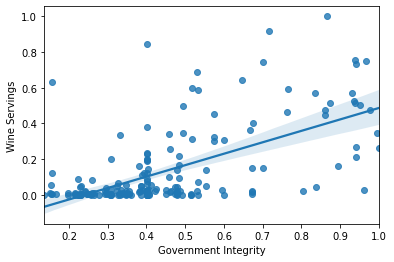

In [76]:
# Government Integrity and Wine Servings
sns.regplot(x="Government Integrity", y="Wine Servings", data=df)

In [77]:
# Get the Pearson Correlation Coefficient and P-value
pearson_coef, p_value = stats.pearsonr(df["Government Integrity"], df["Wine Servings"])

# display the Pearson Correlation coefficient and the P-value
print("The Pearson correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson correlation Coefficient is 0.6170253270471551  with a P-value of P =  1.2364075069591725e-21


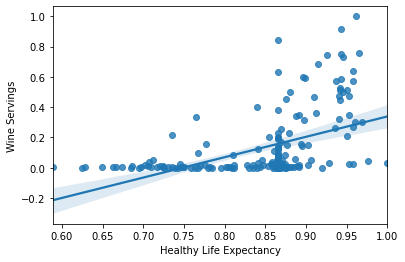

In [78]:
# Healthy Life Expectancy and Wine Servings
sns.regplot(x="Healthy Life Expectancy", y="Wine Servings", data=df)

In [79]:
# Get the Pearson Correlation Coefficient and P-value
pearson_coef, p_value = stats.pearsonr(df["Healthy Life Expectancy"], df["Wine Servings"])

# display the Pearson Correlation coefficient and the P-value
print("The Pearson correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson correlation Coefficient is 0.4846666989359382  with a P-value of P =  9.190853556445509e-13


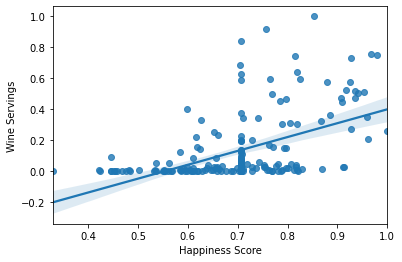

In [80]:
# Happiness Score and Wine Servings
sns.regplot(x="Happiness Score", y="Wine Servings", data=df)

In [81]:
# Get the Pearson Correlation Coefficient and P-value
pearson_coef, p_value = stats.pearsonr(df["Happiness Score"], df["Wine Servings"])

# display the Pearson Correlation coefficient and the P-value
print("The Pearson correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson correlation Coefficient is 0.506978017034614  with a P-value of P =  5.339820760676536e-14


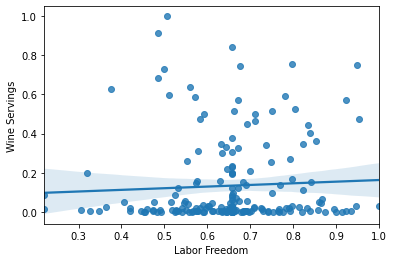

In [82]:
# Labor Freedom and Wine Servings
sns.regplot(x="Labor Freedom", y="Wine Servings", data=df)

In [83]:
# Get the Pearson Correlation Coefficient and P-value
pearson_coef, p_value = stats.pearsonr(df["Labor Freedom"], df["Wine Servings"])

# display the Pearson Correlation coefficient and the P-value
print("The Pearson correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson correlation Coefficient is 0.053483881503651694  with a P-value of P =  0.46007457662704176


**Observation:** Linear regression is likely not going to get us very accurate predictions. The models have a lot of variance around the trend lines. Moreover, the trend line of some plots do not indicate a strong positive relationship. This is particularly true for *Labor Freedom*, which has the flattest regression line and a high P-value. On the other hand, several other features have very low P-scores with better positive correlations.

## Residual Plots

I can employ residual plots to visualize the difference between predicted values and actual values. This will help determine whether linear regression is a good model.

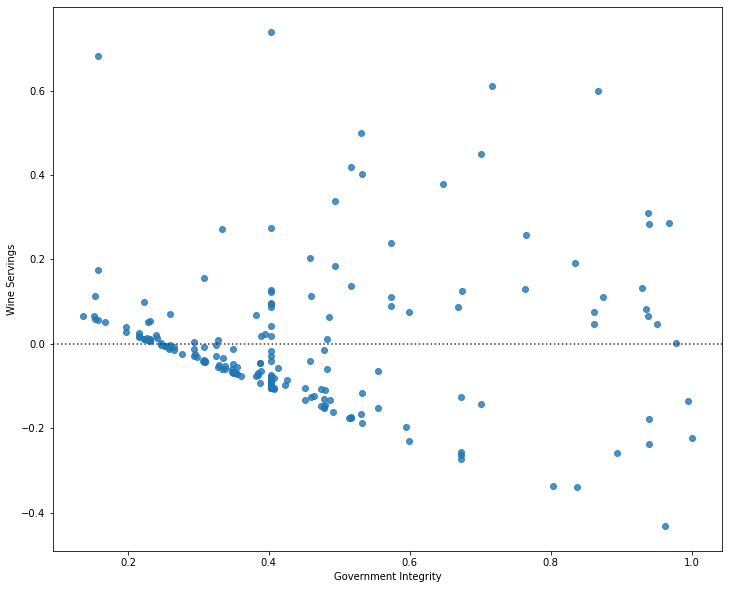

In [84]:
# Residual plot for 'Government Integrity' and "Wine Servings'
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df["Government Integrity"], df["Wine Servings"])
plt.show()

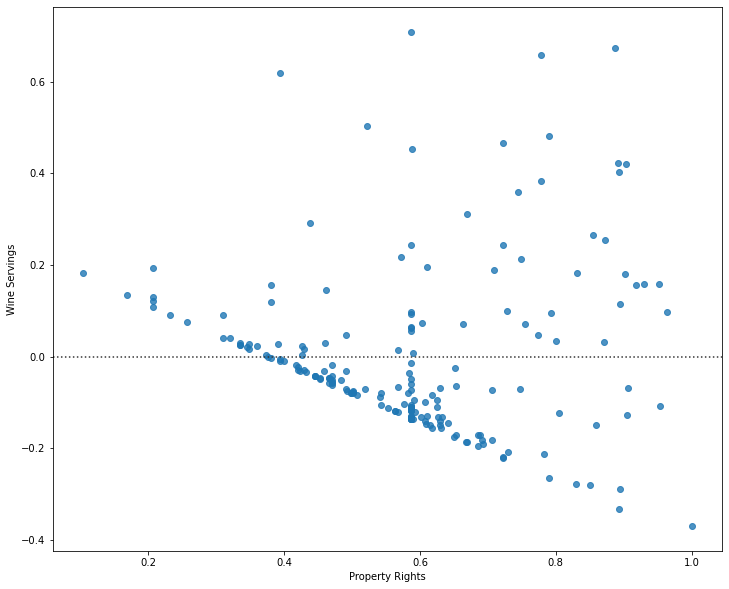

In [85]:
# Residual plot for 'Property Rights' and "Wine Servings'
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df["Property Rights"], df["Wine Servings"])
plt.show()

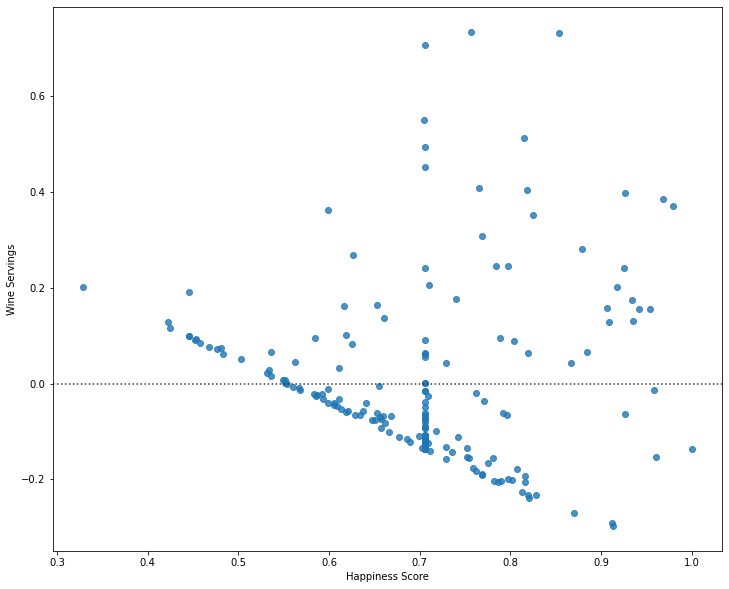

In [86]:
# Residual plot for 'Happiness Score' and "Wine Servings'
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df["Happiness Score"], df["Wine Servings"])
plt.show()

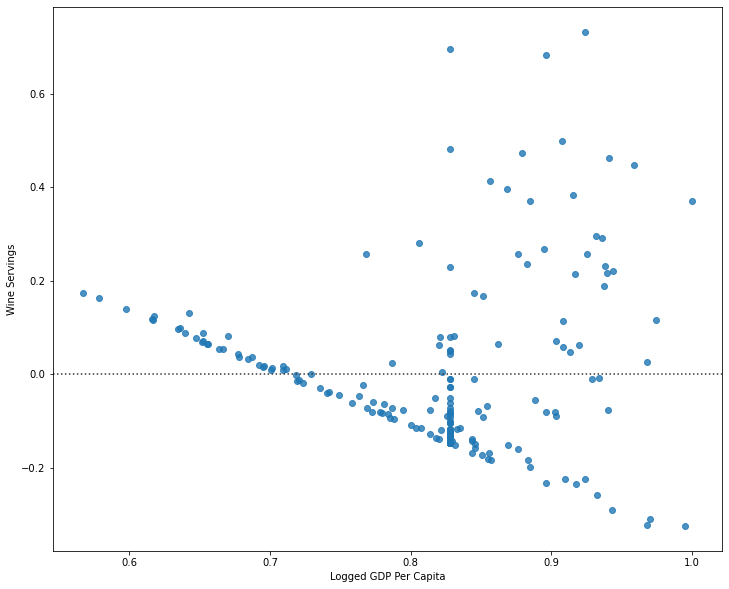

In [87]:
# Residual plot for 'Logged GDP Per Capita' and "Wine Servings'
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df["Logged GDP Per Capita"], df["Wine Servings"])
plt.show()

**Observation:** The residual plots are similar, in that there is not an even spread of the data around the center line. This suggests that linear regression models will not give highly accurate predictions. Gut given the correlations and P-values of some of the features, we still might be able to build a somewhat *adequate* model that has some predictive power. If such a model can be built, then it can partially assist us in making predictions about wine consumption. I will see if I can build an adequate model with a suitable R^2 (R-squared) score.

## Model Development

In this section I will begin to develop the models. I'll start by developing simple linear regression models and multiple linear regression models. Given what we know so far about the correlations, I do not expect to find a useful linear regression model. However, I will construct these models and evaluate them using Means Squared Error and R-Squared scores. Afterwards, I will display several residual plots. I will then proceed to develop an alternative, polynomial model.

**Features to be Used in Model Development:** *Government Integrity*, *Property Rights*, *Happiness Score*, and *Logged GDP Per Capita*.

**Final Process of Feature Selection:** The *forward step* method of feature selection will be employed while developing multiple regression models.

### Initial Simple Linear Regression Models

In this section I will use machine learning techniques to build several simple linear regression models to determine the best predictor. I will split the data into training and testing sets. The models will be trained and then deployed on the test sets. The best model will be selected. Afterwards, I will begin the *forward step* process of adding additional predictors until I reach an optimal *multiple regression model*.

**Regression Models: A First Pass**

 I will split the data into training and testing sets. I will then build 5 simple linear regression models. Afterwards, evaluate the models.

In [88]:
# Construct two dataframes fromm df: one with just the target, "Beer Servings", and the Other with the rest of the numerical data
y_data = df["Wine Servings"]
x_data = df.drop("Wine Servings", axis=1)
x_data = x_data.drop("Country", axis =1)

**Model Using Logged GDP Per Capita As the Primary Predictor**

In [89]:
# use the train_test_split method for our first model
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

print("The number of test samples :", x_test.shape[0])
print("The number of training samples :", x_train.shape[0])

The number of test samples : 39
The number of training samples : 154


In [90]:
# Create the regression object
lre1 = LinearRegression()

In [91]:
# fit the model using the feature 'Logged GDP Per Capita'
lre1.fit(x_train[["Logged GDP Per Capita"]], y_train)

LinearRegression()

In [92]:
# Calculate R^2 score and SME
rscore1 = lre1.score(x_train[["Logged GDP Per Capita"]], y_train)

# Calculate the MSE (Mean squared Error) 
mse1 = mean_squared_error(x_train[["Logged GDP Per Capita"]], y_train)

# Display results
print("The R2 score is :", rscore1)
print("The MSE score is :", mse1)

The R2 score is : 0.24767079813961212
The MSE score is : 0.5000902668819042


**Model Using Happiness Score as the Primary Predictor**

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

print("The number of test samples :", x_test.shape[0])
print("The number of training samples :", x_train.shape[0])

The number of test samples : 39
The number of training samples : 154


In [94]:
# Create the regression object
lre2 = LinearRegression()

In [95]:
# fit the model using the feature 'Happiness Score'
lre2.fit(x_train[["Happiness Score"]], y_train)

LinearRegression()

In [96]:
# Calculate R^2 score and SME
rscore2 = lre2.score(x_train[["Happiness Score"]], y_train)

# Calculate the MSE (Mean squared Error) 
mse2 = mean_squared_error(x_train[["Happiness Score"]], y_train)

# Display results
print("The R2 score is :", rscore2)
print("The MSE score is :", mse2)

The R2 score is : 0.23503833078024972
The MSE score is : 0.3551414584042903


**Model Using Government Integrity as the Primary Predictor**

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

print("The number of test samples :", x_test.shape[0])
print("The number of training samples :", x_train.shape[0])

The number of test samples : 39
The number of training samples : 154


In [98]:
# Create the regression object
lre3 = LinearRegression()

In [99]:
# fit the model using the feature 'Government Integrity'
lre3.fit(x_train[["Government Integrity"]], y_train)

LinearRegression()

In [100]:
# Calculate R^2 score and SME
rscore3 = lre3.score(x_train[["Government Integrity"]], y_train)

# Calculate the MSE (Mean squared Error) 
mse3 = mean_squared_error(x_train[["Government Integrity"]], y_train)

# Display results
print("The R2 score is :", rscore3)
print("The MSE score is :", mse3)

The R2 score is : 0.3872882828544666
The MSE score is : 0.1255249562782035


**Model Using Property Rights as the Primary Predictor**

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

print("The number of test samples :", x_test.shape[0])
print("The number of training samples :", x_train.shape[0])

The number of test samples : 39
The number of training samples : 154


In [102]:
# Create the regression object
lre4 = LinearRegression()

In [103]:
# fit the model using the feature 'Logged GDP Per Capita'
lre4.fit(x_train[["Property Rights"]], y_train)

LinearRegression()

In [104]:
# Calculate R^2 score and SME
rscore4 = lre4.score(x_train[["Property Rights"]], y_train)

# Calculate the MSE (Mean squared Error) 
mse4 = mean_squared_error(x_train[["Property Rights"]], y_train)

# Display results
print("The R2 score is :", rscore4)
print("The MSE score is :", mse4)

The R2 score is : 0.2701749948039156
The MSE score is : 0.23241389596403492


**Evaluation:** Government Integrity provided the best R-squared score and MSE score, followed by Property Rights, Logged GDP Per Capita, and Happiness Score.

**Model Development: A Second Pass**

I'll start with the model with the best R-squared and MSE scores, namely, the model that uses *Government Integrity* as its predictor. I'll then begin the *forward step* approach to feature selection and subsequently create *multiple regression models*. Finally, I will evaluate these models to see if we can find the optimal model.

**Multiple Regression Model Using Government Integrity and Property Rights**

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

print("The number of test samples :", x_test.shape[0])
print("The number of training samples :", x_train.shape[0])

The number of test samples : 39
The number of training samples : 154


In [106]:
# Create the regression object
lre5 = LinearRegression()

In [107]:
lre5_predictors = x_train[["Government Integrity", "Property Rights"]]

In [108]:
# fit the model
lre5.fit(lre5_predictors, y_train)

LinearRegression()

In [109]:
# Calculate R^2 score
rscore5 = lre5.score(lre5_predictors, y_train)

# Display results
print("The R2 score is :", rscore5)

The R2 score is : 0.38980533770593306


**Mulitple Regression Model Using Government Integrity and Logged GDP Per Capita**

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

print("The number of test samples :", x_test.shape[0])
print("The number of training samples :", x_train.shape[0])

The number of test samples : 39
The number of training samples : 154


In [111]:
# Create the regression object
lre6 = LinearRegression()

In [112]:
lre6_predictors = x_train[["Government Integrity", "Logged GDP Per Capita"]]

In [113]:
# fit the model 
lre6.fit(lre6_predictors, y_train)

LinearRegression()

In [114]:
# Calculate R^2 score
rscore6 = lre6.score(lre6_predictors, y_train)

# Display results
print("The R2 score is :", rscore6)

The R2 score is : 0.3965859251120605


**Multiple Regression Model Using Government Integrity and Happiness Score**

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

print("The number of test samples :", x_test.shape[0])
print("The number of training samples :", x_train.shape[0])

The number of test samples : 39
The number of training samples : 154


In [116]:
# Create the regression object
lre7 = LinearRegression()

In [117]:
lre7_predictors = x_train[["Government Integrity", "Happiness Score"]]

In [118]:
# fit the model
lre7.fit(lre7_predictors, y_train)

LinearRegression()

In [119]:
# Calculate R^2 score and SME
rscore7 = lre7.score(lre7_predictors, y_train)

# Display results
print("The R2 score is :", rscore7)

The R2 score is : 0.3944062696776145


**Evaluation:** the model based on Government Integrity and Logged GDP Per Capita had the best R^2 score (**0.3965859251120605**) and will serve as the basis for the next round of model development.

### Model Development: A Third Pass

I'll begin by building a model based on *Government Integrity*, *Logged GDP Per Capita*, and *Happiness Score*. I will use these as the basis for my predictors and continue with the forward pass method.

**Multiple Regression with Government Integrity, Logged GDP Per Capita, and Happiness Score**

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

print("The number of test samples :", x_test.shape[0])
print("The number of training samples :", x_train.shape[0])

The number of test samples : 39
The number of training samples : 154


In [121]:
# Create the regression object
lre8 = LinearRegression()

In [123]:
lre8_predictors = x_train[["Government Integrity", "Logged GDP Per Capita", "Happiness Score"]]

In [124]:
# fit the model 
lre8.fit(lre8_predictors, y_train)

LinearRegression()

In [125]:
# Calculate R^2 score
rscore8 = lre8.score(lre8_predictors, y_train)

# Display results
print("The R2 score is :", rscore8)

The R2 score is : 0.39797082737758904


**Multiple Regression with Government Inegrity, Logged GDP Per Capita, and Property Rights**

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

print("The number of test samples :", x_test.shape[0])
print("The number of training samples :", x_train.shape[0])

The number of test samples : 39
The number of training samples : 154


In [127]:
# Create the regression object
lre9 = LinearRegression()

In [128]:
lre9_predictors = x_train[["Government Integrity", "Logged GDP Per Capita", "Property Rights"]]

In [129]:
# fit the model 
lre9.fit(lre9_predictors, y_train)

LinearRegression()

In [130]:
# Calculate R^2 score
rscore9 = lre9.score(lre9_predictors, y_train)

# Display results
print("The R2 score is :", rscore9)

The R2 score is : 0.40228267048594235


### Model development: A Final Pass

After evaluating the models, it appers that the model that uses *Government Inegrity*, *Logged GDP Per Capita*, and *Property Rights* has the best fit with an R^2 score of **0.40228267048594235**. But I will create one final model with all the predictors involved to see if that model has a better fit.

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

print("The number of test samples :", x_test.shape[0])
print("The number of training samples :", x_train.shape[0])

The number of test samples : 39
The number of training samples : 154


In [132]:
# Create the regression object
lre10 = LinearRegression()

In [133]:
lre10_predictors = x_train[["Government Integrity", "Logged GDP Per Capita", "Property Rights", "Happiness Score"]]

In [134]:
# fit the model using all of the features
lre10.fit(lre10_predictors, y_train)

LinearRegression()

In [135]:
# Calculate R^2 score
rscore10 = lre10.score(lre10_predictors, y_train)

# Display results
print("The R2 score is :", rscore10)

The R2 score is : 0.40361484325680586


## Final Evaluation of the Models Used on Training Data

I created several regression models and used *forward step* feature selection to help identify the best model. The evaluation metrics that were used were mean squared error (MSE) and R-squared. Based off of these evaluation metrics, the model using *Government Integrity*, *Logged GDP Per Capita*, *Property Rights*, *Happiness Score* performed the best, as it had the highest R^2 score. However, this R^2 score was only barely better than the simpler model using three predictors: *Government Integrity*, *Logged GDP Per Capita*, *Property Rights*. Given my commitment to principles of parsimony, I will go ahead and select the simpler model using ***Government Integrity*, *Logged GDP Per Capita*, *Property Rights***.

**The Intercept Value of the Model:** 

In [136]:
lre9.intercept_

-0.38620639362033077

**The Slope:**

In [137]:
lre9.coef_

array([ 0.72460477,  0.39168613, -0.20313562])

## Predictions Using the Training Data

I'll make a few predictions using the training data and then compare them with the test data.

In [138]:
# Function for a distribution plot to chart predicted values versus actual values
def dist(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
    
    plt.title(Title)
    plt.xlabel('Servings')
    plt.ylabel('Proportion')
    
    plt.show()
    plt.close()

In [139]:
# Predictions using training set
yhat_train = lre9.predict(x_train[["Government Integrity", "Logged GDP Per Capita", "Property Rights"]])
yhat_train[0:5]

array([0.37952865, 0.10331967, 0.12055132, 0.36371219, 0.32616508])

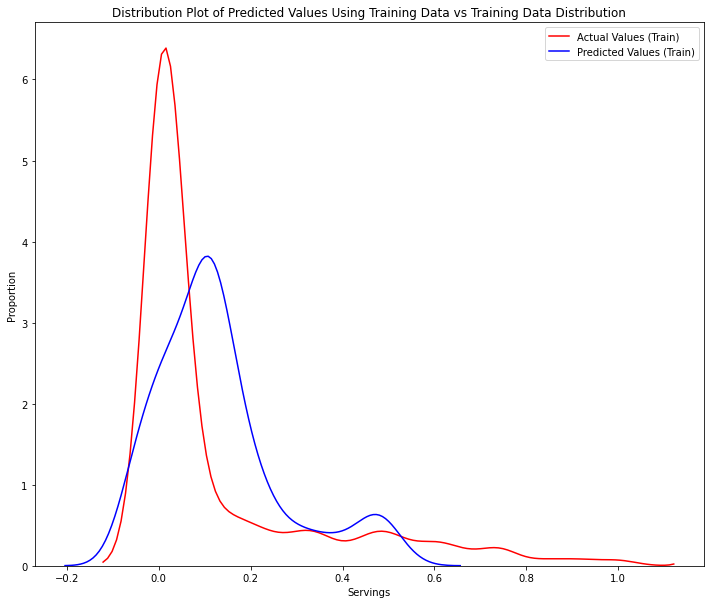

In [140]:
# Distribution Plot 
Title = "Distribution Plot of Predicted Values Using Training Data vs Training Data Distribution"
dist(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

**Remark:** The model does seem to struggle.

## Deploying the Model

Now that I have trained the best multiple regression model, I will now deploy it on the test set. Afterwards, I will evaluate its performance. I am particualarly interested in its R-squared score.

### Model Deployment on the Test Set

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

print("The number of test samples :", x_test.shape[0])
print("The number of training samples :", x_train.shape[0])

The number of test samples : 39
The number of training samples : 154


In [142]:
# Create the regression object
lre11 = LinearRegression()

In [143]:
lre11.fit(x_test[["Government Integrity", "Logged GDP Per Capita", "Property Rights"]], y_test)

LinearRegression()

In [144]:
# Calculate R^2 score
rscore11 = lre11.score(x_test[["Government Integrity", "Logged GDP Per Capita", "Property Rights"]], y_test)

# Display results
print("The R2 score is :", rscore11)

The R2 score is : 0.4230557842961886


**Remark:** The R-squared score is much higher when the model is deployed on the test set

## Predictions Using the Test Set

In [145]:
yhat_test = lre11.predict(x_test[["Government Integrity", "Logged GDP Per Capita", "Property Rights"]])
yhat_test[0:5]

array([0.23553063, 0.23062218, 0.38623309, 0.09618217, 0.15903223])

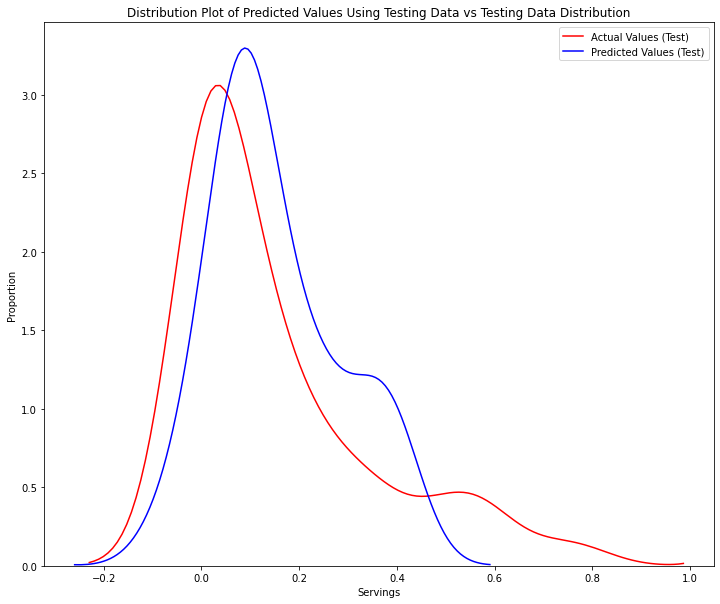

In [146]:
# Distribution Plot 
Title = "Distribution Plot of Predicted Values Using Testing Data vs Testing Data Distribution"
dist(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

**Remark:** the model does better than the one with our training data

## Polynomial Regression

At this point it might be interesting to try to build a simple polynomial model. I will use the best performing feature: *Government Integrity*.

In [147]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

In [148]:
# Use an order of 4 for the polynomial
pr = PolynomialFeatures(degree=4)
x_train_pr = pr.fit_transform(x_train[["Government Integrity"]])
x_test_pr = pr.fit_transform(x_test[["Government Integrity"]])
pr

PolynomialFeatures(degree=4)

In [149]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [150]:
# Generate some predictions
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([0.27429026, 0.2782329 , 0.52946804, 0.06712098, 0.12542913])

In [151]:
# Compare the R^2 score with the actual scores
print("Predicted values: ", yhat[0:5])
print("Actual values: ", y_test[0:4].values)

Predicted values:  [0.27429026 0.2782329  0.52946804 0.06712098 0.12542913]
Actual values:  [0.36216216 0.01891892 0.21081081 0.19189189]


In [152]:
# Generate the R^2 score on the training data
poly.score(x_train_pr, y_train)

0.4871008141385271

In [153]:
# Get the R^2 score on the test data
poly.score(x_test_pr, y_test)

0.22426149036375131

**Observation:** The R^2 value is much higher than the multiple regression model when it comes to the training data. However, the polynomial model has a much lower R^2 score on the test data.

### The Change in R-squared Values on the Test Data Given Different Order Polynomials

Text(0.1, 0.1, 'maximum R^2)')

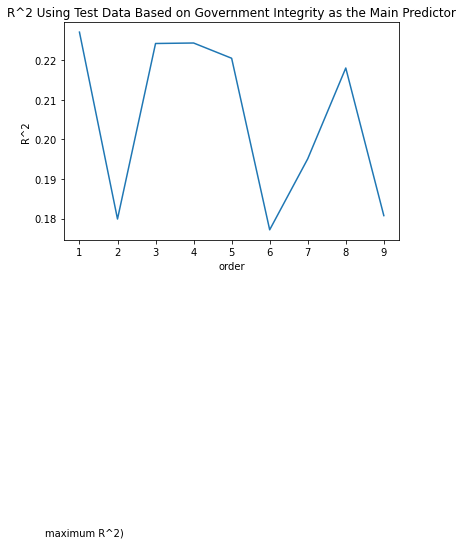

In [154]:
# Create a plot that shows us the R^2 scores for different polynomial orders

rsq_test = []
order = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[["Government Integrity"]])
    x_test_pr = pr.fit_transform(x_test[["Government Integrity"]])
    
    polly = LinearRegression()
    polly.fit(x_train_pr, y_train)
    
    rsq_test.append(polly.score(x_test_pr, y_test))

plt.plot(order, rsq_test)
plt.xlabel("order")
plt.ylabel("R^2")
plt.title("R^2 Using Test Data Based on Government Integrity as the Main Predictor")
plt.text(0.1, 0.1, "maximum R^2)")

**Remark:** Polynomial with an order of '4' appears to give us the best R^2 score. However, this score is much lower than the R^2 score we got with the regression model.

## Summary and Results

This project focused on several questions:
1. Can we build a model that predicts wine drinking behavior in different countries based on certain economic and social factors?
2. If the answer to (1) above is 'yes', then how reliable is the model?

The project set out to answer these questions by using several machine learning and data analysis techniques. The methodology and techniques employed are as follows. 
1. First, relevant data sources were identified and imported. 
2. I proceeded to perform a substantial amount of data wrangling and clearning on several disparate datasets. 
3. Afterwards, I conducted exploratory data analysis and visualization to identify possible features that would predict our target variable, *Wine Servings*.
4. After splitting the cleansed data into training and testing sets, I proceded to build several machine learning models while also employing *forward step* feature selection to fine tune the model.
5. The evaluation metrics used were R-squared and Mean Squared Error.
6. The best model was a multiple regression model that relied on three features as predictors: *Government Integrity*, *Logged GDP Per Capita*, and *Property Rights*.


**Coefficients and P-values of Selected Features:** The individual features had the following Pearson correlation coefficients and P-values with regards to *Wine Servings*:
1. *Government Integrity*: A Pearson correlation Coefficient of 0.6170253270471551  with a P-value of P =  1.2364075069591725e-21.
2. *Logged GDP Per Capita*: A Pearson correlation Coefficient of 0.5079630139118811  with a P-value of P =  4.686737227514223e-14.
3. *Property rights*: A Pearson correlation Coefficient of 0.5210867913451325  with a P-value of P =  7.912884297711097e-15.

**Evaluation of individual selected features used in Simple Linear Regression:** The individual features, when employed in simple linear regression, had the following R-squared scores and MSE scores:
1. *Government Integrity*: The R2 score is 0.3872882828544666 the MSE score is 0.1255249562782035.
2. *Logged GDP Per Capita*: The R2 score is 0.24767079813961212 and the MSE score is 0.5000902668819042.
3. *Property Rights*: The R2 score is 0.2701749948039156 the MSE score is 0.23241389596403492.

**the Best Model: A Multiple Regression Model**

The best model, given the evaluation metrics, was a multiple regression model that relied on *Government Integrity*, *Logged GDP Per Capita*, and *Property Rights* as predictors.

This model had an R-squared score of 0.40228267048594235

**Evaluating the Model and Its Predictive Power:** The individual features of the model were shown to have a somewhat moderate positive correlation with the target, *Wine Servings*. Moreover, they had very low P-values which indicate statistical significance. However, the R-squared scores of these individual features were fairly low (between 0.248 and 0.387). But when we added these features into a multiple regression model, the R-squared score was boosted to 0.402. Consequently, the model has some predictive power.

## Concluding Remarks and Discussion

It seems that we can provide a model that has some power at predicting wine servings in different countries based on economic and social factors. What is interesting, however, is that the model does not seem to be able to provide highly accurate predictions. This militates against our intial assumption that drinking behavior is likely influenced by economic and social factors. But after careful consideration, predicting human drinking behavior is most likely not an easy task. However, our models still show that there is a moderate positive correlation between drinking wine and several economic and social factors - i.e., *Government Integrity*, *Logged GDP Per Capita*, and *Property Rights*. Hence, the model can be deployed to help us address our business problem. We can deploy the model to help determine which international markets would be potentially optimal for new wine advertising campaigns. Nevertheless, we must keep the limitations of the model in mind. Moreover, we would likely want to supplement the model with further research.